##Importing Dataset

In this data analysis process, we analyzed the dataset from an anonymous airline. The data was the customer satisfaction survey collected from over 100k customers. The goal of this anaylsis is to make a satisfaction prediction model and to discover the useful information to the airline.

We followed the following process to anaylze the data.
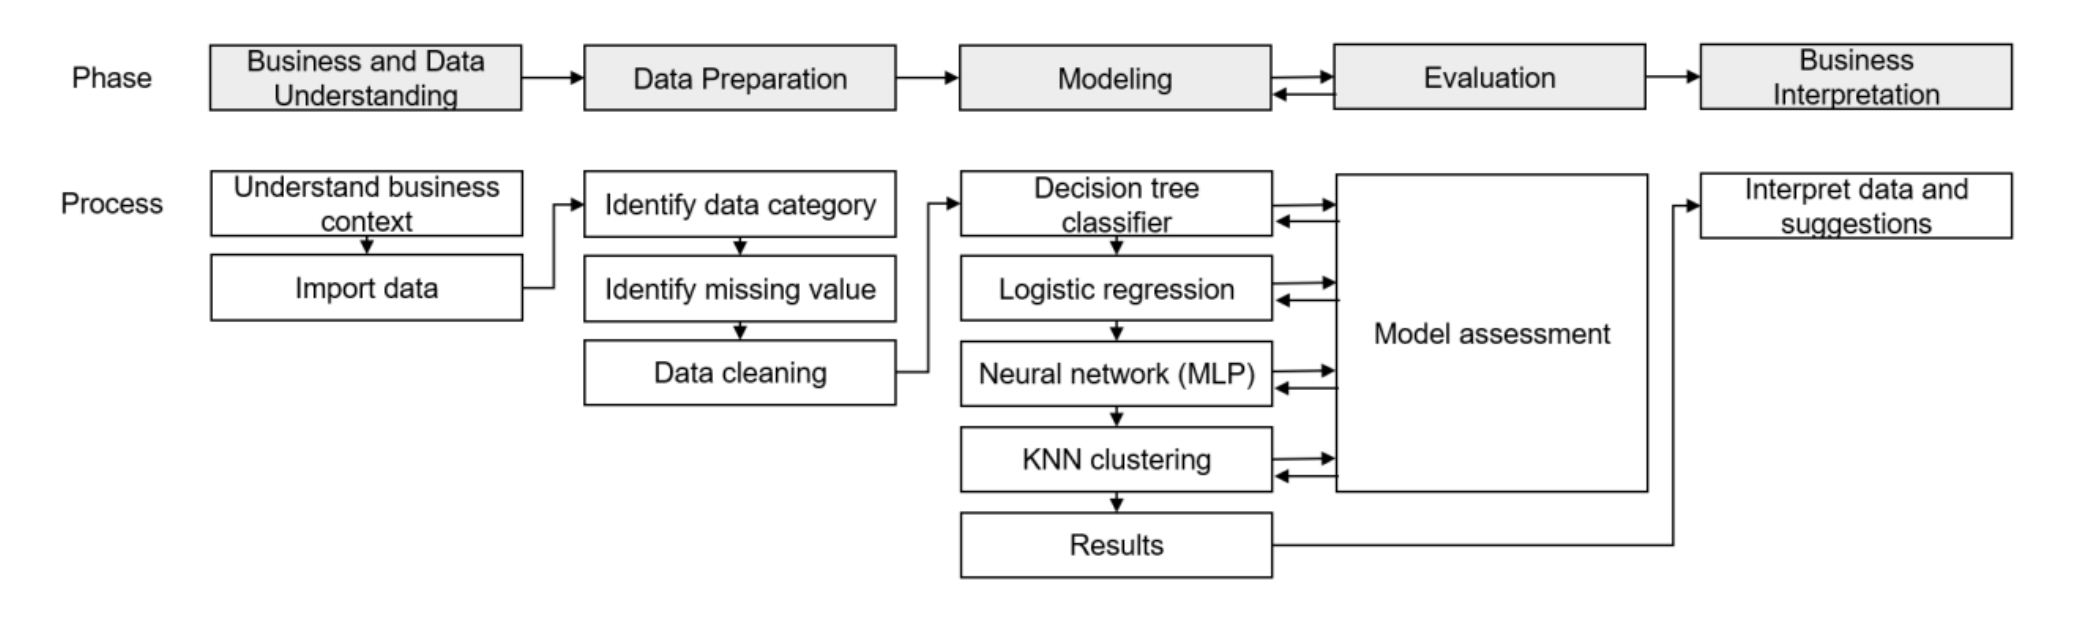

In [ ]:
# Importing the required libraries
import pandas as pd               
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

##Data Preparation

In the first step, data must be imported into the notebook. Then, we have the first look of our data set.

In [ ]:
# Loading the CSV file into a pandas dataframe.
df = pd.read_csv("passenger_data.csv")
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# To peek at last five rows
df.tail(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103919,103919,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
103920,103920,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
103921,103921,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
103922,103922,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied
103923,103923,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,5,4,2,2,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [ ]:
# Getting the number of instances and features (rows,columns)
df.shape

(103924, 25)

In [ ]:
# Getting the dimensions of the data frame
df.ndim

2

In [ ]:
"""
## The purposes of creating this function are (1) Python built-in function called unique() 
## has the long-period execution. (2) unnique cannot filter the column with too many
## unique value such as flight distance.
"""
#convert into dataframe and turn into a list.
cols = df.columns.tolist()

#check the unique value.
def unique_detector (data, cols, threshold):
    uni_counter = 0    #set a int to count how many feature has limited unique value.
    Nonuni_counter = 0  #set a int to count how many feature has more than certain unique value.
    colsDict = {}   #create a dictionary to contain the columns' name
    for y in cols:  #start a loop to count cols.
      checker = 0   #set a int to count how many unique item in a column.
      uni_counter += 1
      colsDict[y] = []          #creat a key based on the column name
      for x in data[y]:                    #start a loop to count items
        if x not in colsDict[y]:
          colsDict[y].append(x) #insert the items into the list
          checker  = checker + 1
          if checker >= threshold:  #only accept the column that has less than certain number of unique items.
            colsDict[y] = ["too many unique values"]     #Otherwise print this sentance.
            uni_counter -= 1
            Nonuni_counter += 1
            break               #jump to the next column
    print('------------------------------summary--------------------------------')
    print('Number of columns with less than 10 unique values: %.0f' % uni_counter)
    print('Number of columns with more than 10 unique values: %.0f' % Nonuni_counter)
    print('------------------------------columns details--------------------------------')
    for y in colsDict:
        print(y)
        print(colsDict[y])     #print each item in the dict.
        print('-------------------------')

unique_detector(df, cols, 20) 

------------------------------summary--------------------------------
Number of columns with less than 10 unique values: 19
Number of columns with more than 10 unique values: 6
------------------------------columns details--------------------------------
Unnamed: 0
['too many unique values']
-------------------------
id
['too many unique values']
-------------------------
Gender
['Male', 'Female', 'na', 'Diverse']
-------------------------
Customer Type
['Loyal Customer', 'disloyal Customer', 'Disloyal Customer']
-------------------------
Age
['too many unique values']
-------------------------
Type of Travel
['Personal Travel', 'Business travel', 'Business Travel']
-------------------------
Class
['Eco Plus', 'Business', 'Eco']
-------------------------
Flight Distance
['too many unique values']
-------------------------
Inflight wifi service
[3, 2, 4, 1, 5, 0]
-------------------------
Departure/Arrival time convenient
[4, 2, 5, 3, 1, 0]
-------------------------
Ease of Online booki

In [ ]:
# Finding the null values
print(df.isnull().sum())
# As we can see here in the gender "na" is not revealed.
# Possibly, the "na" is a string rather than a actual null value.

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103924 entries, 0 to 103923
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103924 non-null  int64  
 1   id                                 103924 non-null  int64  
 2   Gender                             103924 non-null  object 
 3   Customer Type                      103924 non-null  object 
 4   Age                                103924 non-null  int64  
 5   Type of Travel                     103924 non-null  object 
 6   Class                              103924 non-null  object 
 7   Flight Distance                    103924 non-null  int64  
 8   Inflight wifi service              103924 non-null  int64  
 9   Departure/Arrival time convenient  103924 non-null  int64  
 10  Ease of Online booking             103924 non-null  int64  
 11  Gate location                      1039

##Data Cleaning

After the data understanding, we start to clean the data based on our commitment.Besides, we did some feature engineering to manipulate the features (e.g. flight distance and delay in minutes).

In [ ]:
#code for dropping lines with missing entry for delay. We decided to drop the lines:
df_new = df.dropna()

In [ ]:
#code to check if null entries are deleted
df_new.isnull().sum().sort_values(ascending=False)

Unnamed: 0                           0
Online boarding                      0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Cleanliness                          0
Inflight service                     0
Checkin service                      0
Baggage handling                     0
Leg room service                     0
On-board service                     0
Inflight entertainment               0
Seat comfort                         0
Food and drink                       0
id                                   0
Gate location                        0
Ease of Online booking               0
Departure/Arrival time convenient    0
Inflight wifi service                0
Flight Distance                      0
Class                                0
Type of Travel                       0
Age                                  0
Customer Type                        0
Gender                               0
satisfaction                         0
dtype: int64

In [ ]:
#check if data type is correct
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103614 entries, 0 to 103923
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103614 non-null  int64  
 1   id                                 103614 non-null  int64  
 2   Gender                             103614 non-null  object 
 3   Customer Type                      103614 non-null  object 
 4   Age                                103614 non-null  int64  
 5   Type of Travel                     103614 non-null  object 
 6   Class                              103614 non-null  object 
 7   Flight Distance                    103614 non-null  int64  
 8   Inflight wifi service              103614 non-null  int64  
 9   Departure/Arrival time convenient  103614 non-null  int64  
 10  Ease of Online booking             103614 non-null  int64  
 11  Gate location                      1036

In [ ]:
#Convert Arrival Delay to int64
#df_new['Arrival Delay in Minutes'] = df_new['Arrival Delay in Minutes'].astype('int64')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103614 entries, 0 to 103923
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103614 non-null  int64  
 1   id                                 103614 non-null  int64  
 2   Gender                             103614 non-null  object 
 3   Customer Type                      103614 non-null  object 
 4   Age                                103614 non-null  int64  
 5   Type of Travel                     103614 non-null  object 
 6   Class                              103614 non-null  object 
 7   Flight Distance                    103614 non-null  int64  
 8   Inflight wifi service              103614 non-null  int64  
 9   Departure/Arrival time convenient  103614 non-null  int64  
 10  Ease of Online booking             103614 non-null  int64  
 11  Gate location                      1036

In [ ]:
#count how many customers are satisfied / dissatisfied
df_customersatisfaction = df_new.groupby('id')['satisfaction'].unique().value_counts()
print(df_customersatisfaction)

[neutral or dissatisfied]    58708
[satisfied]                  44900
[no answer]                      6
Name: satisfaction, dtype: int64


In [ ]:
#drop lines for which satisfaction was not answered
df_new = df_new[df_new.satisfaction != "no answer"]
df_customersatisfaction = df_new.groupby('id')['satisfaction'].unique().value_counts()
print(df_customersatisfaction)

[neutral or dissatisfied]    58708
[satisfied]                  44900
Name: satisfaction, dtype: int64


In [ ]:
#count how many customers didn't answer the "Gender Question" because this could be relevant for the second question
df_gender = df_new.groupby('id')['Gender'].unique().value_counts()
print(df_gender)

[Female]     52573
[Male]       51019
[na]             9
[Diverse]        7
Name: Gender, dtype: int64


In [ ]:
#drop lines for which gender was not answered
df_new = df_new[df_new.Gender != "na"]

In [ ]:
df_new = df_new[df_new.satisfaction != "no answer"]

In [ ]:
#rename the column name for the following function.
df_new.rename(columns={'Inflight wifi service': 'IWS'
            , 'Departure/Arrival time convenient': 'DTC', 'Ease of Online booking': 'EOB', 
            'Gate location': 'GL', 'Food and drink' : 'FAD', 'Online boarding': 'OB',
            'Seat comfort': 'SC', 'Inflight entertainment': 'IE', 'On-board service': 'OS', 
            'Leg room service': 'LRS', 'Baggage handling': 'BH', 'Checkin service': 'CS',
            'Inflight service': 'IS', 'Cleanliness': 'CL'}, inplace=True)
df_new = df_new[df_new.IWS != 0]
df_new = df_new[df_new.DTC != 0]
df_new = df_new[df_new.EOB != 0]
df_new = df_new[df_new.GL != 0]
df_new = df_new[df_new.FAD != 0]
df_new = df_new[df_new.OB != 0]
df_new = df_new[df_new.SC != 0]
df_new = df_new[df_new.IE != 0]
df_new = df_new[df_new.OS != 0]
df_new = df_new[df_new.LRS != 0]
df_new = df_new[df_new.BH != 0]
df_new = df_new[df_new.CS != 0]
df_new = df_new[df_new.IS != 0]
df_new = df_new[df_new.CL != 0]
#transform the column name back.
df_new.rename(columns={'IWS': 'Inflight wifi service'
            , 'DTC': 'Departure/Arrival time convenient', 'EOB': 'Ease of Online booking', 
            'GL': 'Gate location', 'FAD': 'Food and drink', 'OB': 'Online boarding',
            'SC': 'Seat comfort', 'IE': 'Inflight entertainment', 'OS': 'On-board service',
            'LRS': 'Leg room service', 'BH': 'Baggage handling', 'CS': 'Checkin service',
            'IS': 'Inflight service', 'CL': 'Cleanliness'}, inplace=True)

In [ ]:
df_new

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103919,103919,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
103920,103920,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
103921,103921,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
103922,103922,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
#drop the columns "Unnamed" because they are not relevant
df_new = df_new.drop("Unnamed: 0", axis = 1)

In [ ]:
#convert into dataframe and turn into a list.
cols = df_new.columns.tolist()

unique_detector(df_new, cols, 20) 

------------------------------summary--------------------------------
Number of columns with less than 10 unique values: 19
Number of columns with more than 10 unique values: 5
------------------------------columns details--------------------------------
id
['too many unique values']
-------------------------
Gender
['Male', 'Female', 'Diverse']
-------------------------
Customer Type
['Loyal Customer', 'disloyal Customer', 'Disloyal Customer']
-------------------------
Age
['too many unique values']
-------------------------
Type of Travel
['Personal Travel', 'Business travel', 'Business Travel']
-------------------------
Class
['Eco Plus', 'Business', 'Eco']
-------------------------
Flight Distance
['too many unique values']
-------------------------
Inflight wifi service
[3, 2, 4, 1, 5]
-------------------------
Departure/Arrival time convenient
[4, 2, 5, 3, 1]
-------------------------
Ease of Online booking
[3, 2, 5, 4, 1]
-------------------------
Gate location
[1, 3, 2, 5, 4]
-

In [ ]:
#change the lower case in necessary columns.
df_new['Customer Type'] = df_new['Customer Type'].str.lower()
df_new['Type of Travel'] = df_new['Type of Travel'].str.lower()
df_new['Class'] = df_new['Class'].str.lower()


In [ ]:
#maybe the total delay would be interesting
df_new['Total Delay in Minutes'] = df_new['Departure Delay in Minutes'] + df_new['Arrival Delay in Minutes']

In [ ]:
 #insert column with flight distance classifications (according to the definition of the EU Air Passenger Rights)
def label_fdclassification (row):
   if row['Flight Distance'] <= 1500 :
      return 'short-haul'
   if row['Flight Distance'] > 1500 and row['Flight Distance'] < 3500 :
      return 'mid-haul'
   if row['Flight Distance'] >= 3500 :
      return 'long-haul'

df_new.apply (lambda row: label_fdclassification(row), axis=1)
df_new['Flight Distance Classification'] = df_new.apply (lambda row: label_fdclassification(row), axis=1)

df_new.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,Flight Distance Classification
0,70172,Male,loyal customer,13,personal travel,eco plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,43.0,short-haul
1,5047,Male,disloyal customer,25,business travel,business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,7.0,short-haul
2,110028,Female,loyal customer,26,business travel,business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0.0,short-haul
3,24026,Female,loyal customer,25,business travel,business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,20.0,short-haul
4,119299,Male,loyal customer,61,business travel,business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0.0,short-haul


In [ ]:
#convert into dataframe and turn into a list.(this code should be the 
#same as previous one, but we need to create a datafram called df_new2)
df_new2 = pd.DataFrame(df_new.columns)   
cols = df_new2[0].tolist()

#check the unique value in every column .
unique_detector(df_new, cols, 20)

------------------------------summary--------------------------------
Number of columns with less than 10 unique values: 20
Number of columns with more than 10 unique values: 6
------------------------------columns details--------------------------------
id
['too many unique values']
-------------------------
Gender
['Male', 'Female', 'Diverse']
-------------------------
Customer Type
['loyal customer', 'disloyal customer']
-------------------------
Age
['too many unique values']
-------------------------
Type of Travel
['personal travel', 'business travel']
-------------------------
Class
['eco plus', 'business', 'eco']
-------------------------
Flight Distance
['too many unique values']
-------------------------
Inflight wifi service
[3, 2, 4, 1, 5]
-------------------------
Departure/Arrival time convenient
[4, 2, 5, 3, 1]
-------------------------
Ease of Online booking
[3, 2, 5, 4, 1]
-------------------------
Gate location
[1, 3, 2, 5, 4]
-------------------------
Food and drink


In [ ]:
#align the index and the rows
df_new = df_new.reset_index(drop=True)

In [ ]:
df_new.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay in Minutes
count,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000
mean,65313.982016,39.812584,1222.336683,2.818663,3.208061,2.878064,2.985758,3.212442,3.326958,3.455150,3.381737,3.385227,3.380228,3.636404,3.291850,3.644620,3.294501,14.933630,15.367673,30.301303
std,37361.714024,15.024275,999.600082,1.252633,1.385995,1.296924,1.281386,1.323648,1.262991,1.311032,1.325664,1.286920,1.295055,1.169694,1.265531,1.165114,1.308617,38.283424,38.857451,76.463593
min,1.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33151.500000,28.000000,438.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,65525.000000,40.000000,867.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,2.000000
75%,97610.500000,51.000000,1773.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000,25.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,3176.000000


##Data Interpretation

In this section, we plotted several graphs to visualize the data including features, customers distribution, and feature correlation.


(1) Customers rating overview

In [ ]:
#create two new tables, one with satisfied customers only and one with dissatisfied customers

#Replacing Satisfaction string to numerical values
df_new = df_new.replace (['neutral or dissatisfied', 'satisfied'] , [0,1])

df_satisfied = df_new[df_new.satisfaction == 1] 
df_dissatisfied = df_new[df_new.satisfaction == 0] 

In [ ]:
# create two lists with titels and means from "satisfied data frame" for bar-chart 

X_bar = []
Z = 0
for i in df_satisfied.head(0): 
  Z = Z +1
  if Z > 7 and Z < 22:
    X_bar.append(i)

Y_bar = []
Z = 0
for i in df_satisfied.mean(): 
  Z = Z +1
  if Z > 7 and Z < 22:
    Y_bar.append(i)

#check if lists are correct:
print (X_bar)
print (Y_bar)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
[3.5608405718644653, 4.161913432909274, 4.025911070646424, 4.056128349614902, 3.9067152242919363, 3.899062476931027, 4.0068653264105905, 3.6488348630625755, 4.007234429981053, 3.7924161519722435, 12.665395309923964, 12.754693767071041, 1.0, 25.420089076995005]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Average Rating of satisfied customers')

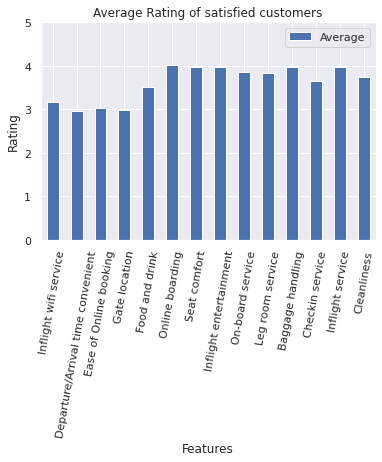

In [ ]:
df = pd.DataFrame({'lab':['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'],
                   'val':[3.1612321261526124, 2.9699986636375786, 3.031471335026059, 2.9777941110962627, 3.5208917991892736, 4.027261793398369, 3.966279121564435, 3.965299122455343, 3.857610583990378, 3.8224419795982003, 3.9664573032206336, 3.6456189585282197, 3.9699763909305537, 3.744042050870863]})
ax = df.plot.bar(x='lab', y='val', rot=80)
ax.set_ylabel('Rating')
ax.set_xlabel('Features')
ax.set_ylim(0,5)
ax.legend(['Average'])
ax.set_title('Average Rating of satisfied customers')

In [ ]:
# create two lists with titels and means from "dissatisfied data frame" for bar-chart 

X_bar = []
Z = 0
for i in df_dissatisfied.head(0): 
  Z = Z +1
  if Z > 7 and Z < 22:
    X_bar.append(i)

Y_bar = []
Z = 0
for i in df_dissatisfied.mean(): 
  Z = Z +1
  if Z > 7 and Z < 22:
    Y_bar.append(i)

#check if lists are correct:
print (X_bar)
print (Y_bar)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
[2.9539795545819643, 2.707539247900694, 3.031726907630522, 2.881434830230011, 2.998357064622125, 2.995326761591822, 3.361573566995254, 3.02701715954728, 3.37561153705732, 2.9251186564439577, 16.61633807959109, 17.306133625410734, 0.0, 33.922471705001826]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Average Rating of dissatisfied customers')

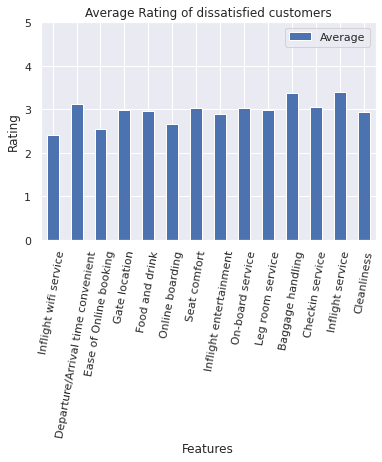

In [ ]:
df = pd.DataFrame({'lab':['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'],
                   'val':[2.399771724502138, 3.1291971175959525, 2.5471286690175634, 2.976491030817192, 2.9584334168072095, 2.6563942692628744, 3.03706921517521, 2.8940563193131292, 3.019386381833359, 2.991005263964839, 3.375802797226623, 3.043201989744638, 3.389107510945299, 2.9362191444779477]})
ax = df.plot.bar(x='lab', y='val', rot=80)
ax.set_ylabel('Rating')
ax.set_xlabel('Features')
ax.set_ylim(0,5)
ax.legend(['Average'])
ax.set_title('Average Rating of dissatisfied customers')

**Result: We see that for dissatisfied customers Inflight wifi services, Ease of Online booking and Online boarding were answered with a low score and therefore these might be of most relevance**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


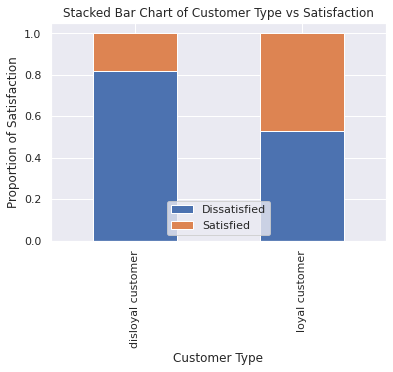

In [ ]:
df_new.rename(columns={'Flight Distance': 'FlightDistance', 
                           'Customer Type': 'CustomerType',
                            'Type of Travel': 'TypeofTravel',
                            'Flight Distance Classification': 'FlightDistanceClassification'}, inplace=True)
df_satisfied.rename(columns={'Flight Distance': 'FlightDistance', 
                           'Customer Type': 'CustomerType',
                           'Flight Distance Classification': 'FlightDistanceClassification'}, inplace=True)


table=pd.crosstab(df_new.CustomerType,df_new.satisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Customer Type vs Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Proportion of Satisfaction')
plt.legend(['Dissatisfied', 'Satisfied'], loc='lower center')
plt.savefig('Customer Type vs Satisfaction')

In [ ]:
#count how many customers are in each Customer Type
df_CustomerType = df_new.groupby(df_new.index)['CustomerType'].unique().value_counts()
print(df_CustomerType)

[loyal customer]       80073
[disloyal customer]    15346
Name: CustomerType, dtype: int64


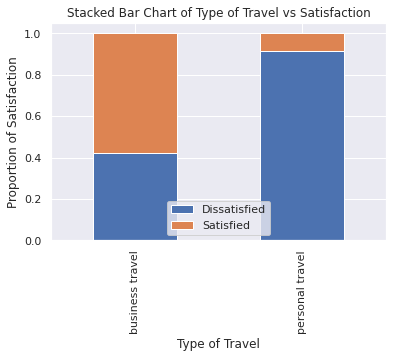

In [ ]:
table=pd.crosstab(df_new.TypeofTravel,df_new.satisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Type of Travel vs Satisfaction')
plt.xlabel('Type of Travel')
plt.ylabel('Proportion of Satisfaction')
plt.legend(['Dissatisfied', 'Satisfied'], loc='lower center')
plt.savefig('Type of Travel vs Satisfaction')

In [ ]:
#count how many customers are in each Type of Travel
df_TypeofTravel = df_new.groupby(df_new.index)['TypeofTravel'].unique().value_counts()
print(df_TypeofTravel)

[business travel]    65933
[personal travel]    29486
Name: TypeofTravel, dtype: int64


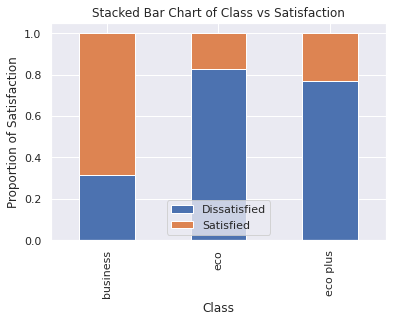

In [ ]:
table=pd.crosstab(df_new.Class,df_new.satisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Class vs Satisfaction')
plt.xlabel('Class')
plt.ylabel('Proportion of Satisfaction')
plt.legend(['Dissatisfied', 'Satisfied'], loc='lower center')
plt.savefig('Class vs Satisfaction')

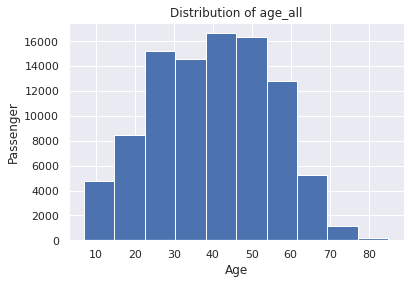

In [ ]:
df_new.Age.hist()
plt.title('Distribution of age_all')
plt.xlabel('Age')
plt.ylabel('Passenger')
plt.savefig('hist_age_all')

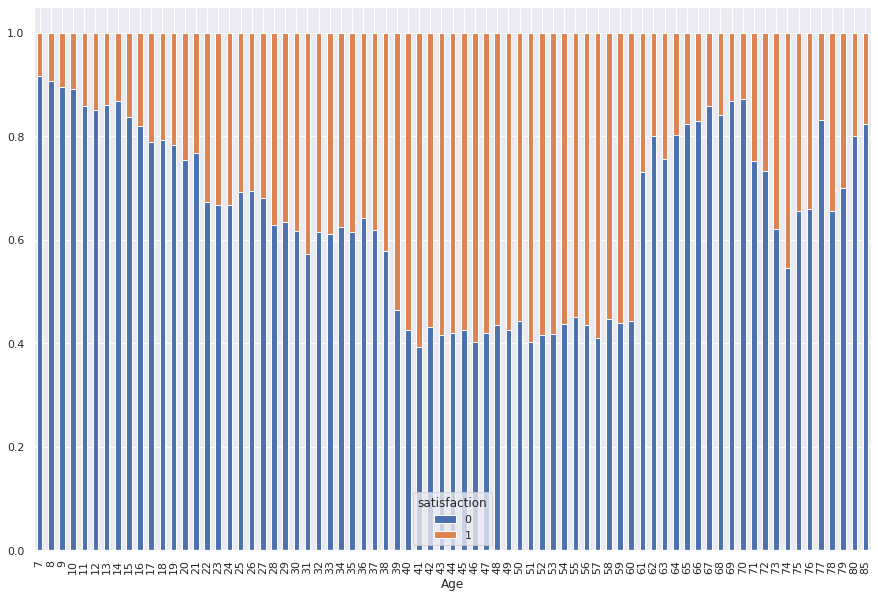

In [ ]:
table=pd.crosstab(df_new.Age,df_new.satisfaction)

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

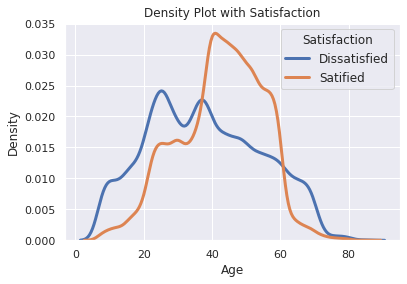

In [ ]:
"""
reference:
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
"""
# List of five airlines to plot

# Iterate through the five airlines

subset = df_new[df_new['satisfaction'] == 0]
    
# Draw the density plot
sns.distplot(subset['Age'], hist = False, kde = True,
              kde_kws = {'linewidth': 3},
              label = 'Dissatisfied')

subset = df_new[df_new['satisfaction'] == 1]
    
# Draw the density plot
sns.distplot(subset['Age'], hist = False, kde = True,
              kde_kws = {'linewidth': 3},
              label = 'Satified')
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Satisfaction')
plt.title('Density Plot with Satisfaction')
plt.xlabel('Age')
plt.ylabel('Density')

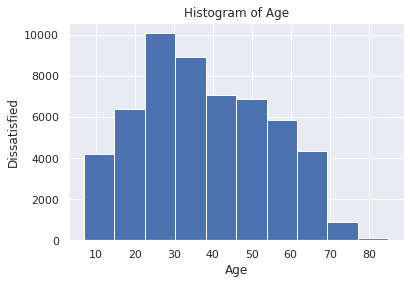

In [ ]:
df_dissatisfied.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Dissatisfied')
plt.savefig('hist_age')

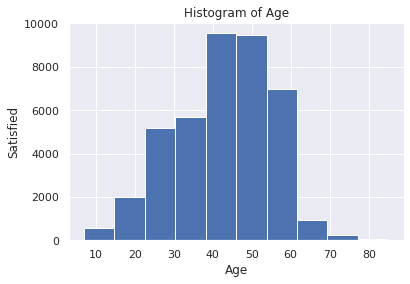

In [ ]:
df_satisfied.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Satisfied')
plt.savefig('hist_age')

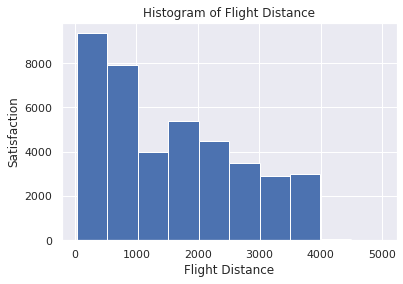

In [ ]:
df_satisfied.FlightDistance.hist()
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.savefig('hist_Fligth Distance')

In [ ]:
#Class string to numerical values
df_new = df_new.replace (['eco','eco plus','business'] , [3,2,1])

#Type of Travel
df_new = df_new.replace (['personal travel','business travel'] , [0,1])

#Customer Type
df_new = df_new.replace (['loyal customer','disloyal customer'] , [0,1])

#Gender
df_new = df_new.replace (['Male','Female', 'Diverse'] , [0,1,2])

#Flight distance classification
df_new = df_new.replace (['short-haul', 'mid-haul' ,'long-haul'] , [1,2,3])
df_new.head(5)

,id,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,FlightDistanceClassification
0,70172,0,0,13,0,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,43.0,1
1,5047,0,1,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,7.0,1
2,110028,1,0,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0,1
3,24026,1,0,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,20.0,1
4,119299,0,0,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0.0,1


In [ ]:
df_new.corr()

,id,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,FlightDistanceClassification
id,1.000000,-0.001140,0.004404,0.023117,-0.001462,-0.089966,0.091748,-0.033598,-0.003720,-0.000144,-0.000349,-0.000959,0.047774,0.052743,0.001633,0.054952,0.041535,0.072012,0.078331,0.077444,0.024678,-0.020615,-0.038812,0.009829,-0.030045,0.080213
Gender,-0.001140,1.000000,0.031079,-0.006591,0.006360,0.007648,-0.007322,-0.007481,-0.005987,-0.006209,-0.001020,-0.006630,0.040772,0.026375,-0.005665,-0.005669,-0.022871,-0.036347,-0.010999,-0.038419,-0.007005,-0.001523,0.000782,-0.012702,-0.000365,-0.004857
CustomerType,0.004404,0.031079,1.000000,-0.251343,0.283746,0.103911,-0.204830,-0.020296,-0.104866,-0.038224,0.011567,-0.058193,-0.190489,-0.155226,-0.110548,-0.071283,-0.057647,0.015920,-0.044694,0.013630,-0.080362,0.010828,0.011351,-0.217951,0.011190,-0.223159
Age,0.023117,-0.006591,-0.251343,1.000000,0.066823,-0.141619,0.083349,0.023115,-0.011475,0.026987,-0.005457,0.017759,0.190399,0.155208,0.075754,0.070357,0.056477,-0.035926,0.044737,-0.038535,0.046911,-0.013333,-0.015676,0.155232,-0.014642,0.104673
TypeofTravel,-0.001462,0.006360,0.283746,0.066823,1.000000,-0.555264,0.276162,0.123791,-0.263048,0.129401,0.032887,0.066603,0.222414,0.133232,0.160458,0.061732,0.139654,0.039671,-0.019669,0.028659,0.083704,0.007449,0.007084,0.462382,0.007330,0.276323
Class,-0.089966,0.007648,0.103911,-0.141619,-0.555264,1.000000,-0.452162,-0.051161,0.125830,-0.114561,-0.004204,-0.088702,-0.320511,-0.234733,-0.207373,-0.221002,-0.215863,-0.170682,-0.152962,-0.163966,-0.140013,0.012249,0.016254,-0.499446,0.014393,-0.456344
FlightDistance,0.091748,-0.007322,-0.204830,0.083349,0.276162,-0.452162,1.000000,0.011609,-0.072769,0.057720,0.002695,0.057443,0.199746,0.157101,0.132077,0.119705,0.137842,0.073159,0.079919,0.066936,0.093089,0.000114,-0.003895,0.307644,-0.001922,0.909066
Inflight wifi service,-0.033598,-0.007481,-0.020296,0.023115,0.123791,-0.051161,0.011609,1.000000,0.390283,0.676505,0.379466,0.152009,0.454555,0.147859,0.228700,0.128988,0.159591,0.120150,0.058507,0.109062,0.157379,-0.026507,-0.028705,0.374019,-0.027859,0.011814
Departure/Arrival time convenient,-0.003720,-0.005987,-0.104866,-0.011475,-0.263048,0.125830,-0.072769,0.390283,1.000000,0.517038,0.522039,-0.005099,0.058115,-0.009344,-0.031381,0.079633,-0.000950,0.083046,0.120879,0.084417,0.005855,-0.005449,-0.007152,-0.056876,-0.006363,-0.073187
Ease of Online booking,-0.000144,-0.006209,-0.038224,0.026987,0.129401,-0.114561,0.057720,0.676505,0.517038,1.000000,0.528079,0.030255,0.351465,0.035199,0.037107,0.032684,0.084561,0.023817,0.020201,0.022653,0.019794,-0.012841,-0.015101,0.230297,-0.014103,0.059224


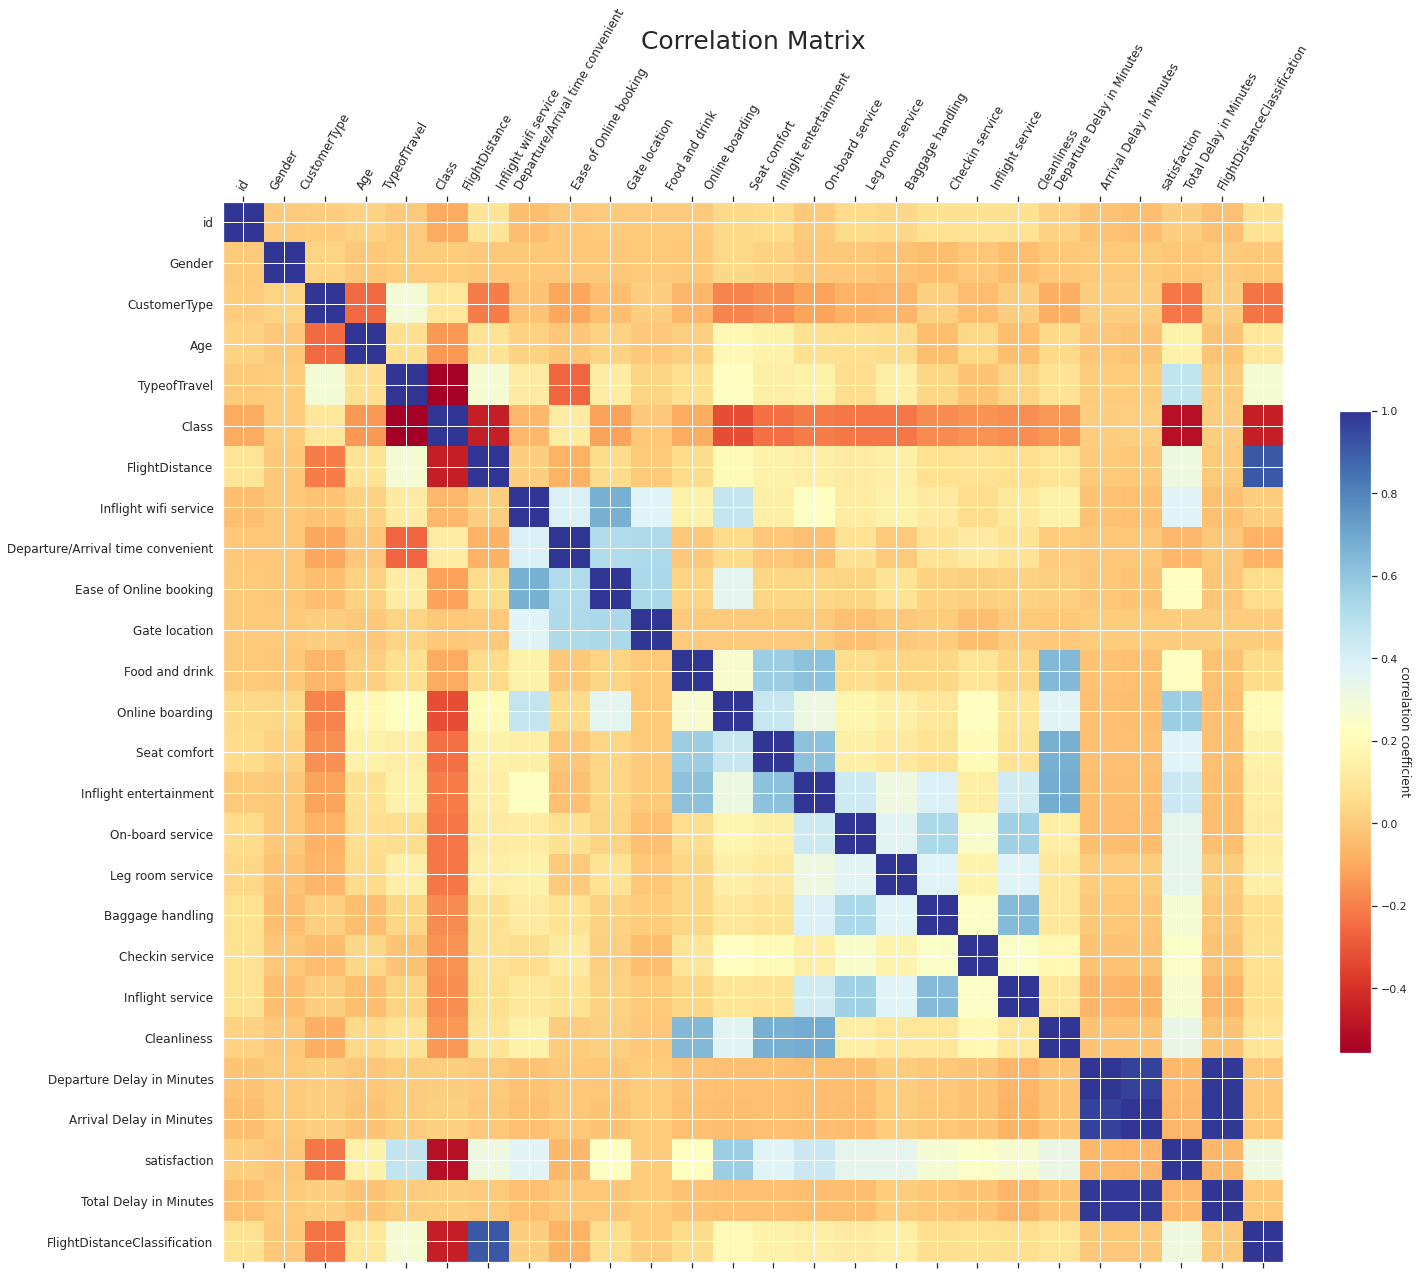

'\nreference: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas\n'

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')    # change the color

f = plt.figure(figsize=(25, 19))   # set the figure size
plt.matshow(df_new.corr(), fignum=f.number, cmap=cm)
plt.xticks(range(df_new.select_dtypes(['number']).shape[1]), df_new.select_dtypes(['number']).columns, fontsize=12, rotation=60)
plt.yticks(range(df_new.select_dtypes(['number']).shape[1]), df_new.select_dtypes(['number']).columns, fontsize=12)
plt.title('Correlation Matrix', fontsize=25, pad=100);

cb = plt.colorbar(fraction=0.023, pad=0.04).set_label('correlation coefficient', rotation=270)  #add and adjust the color bar

plt.show()

"""
reference: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
"""

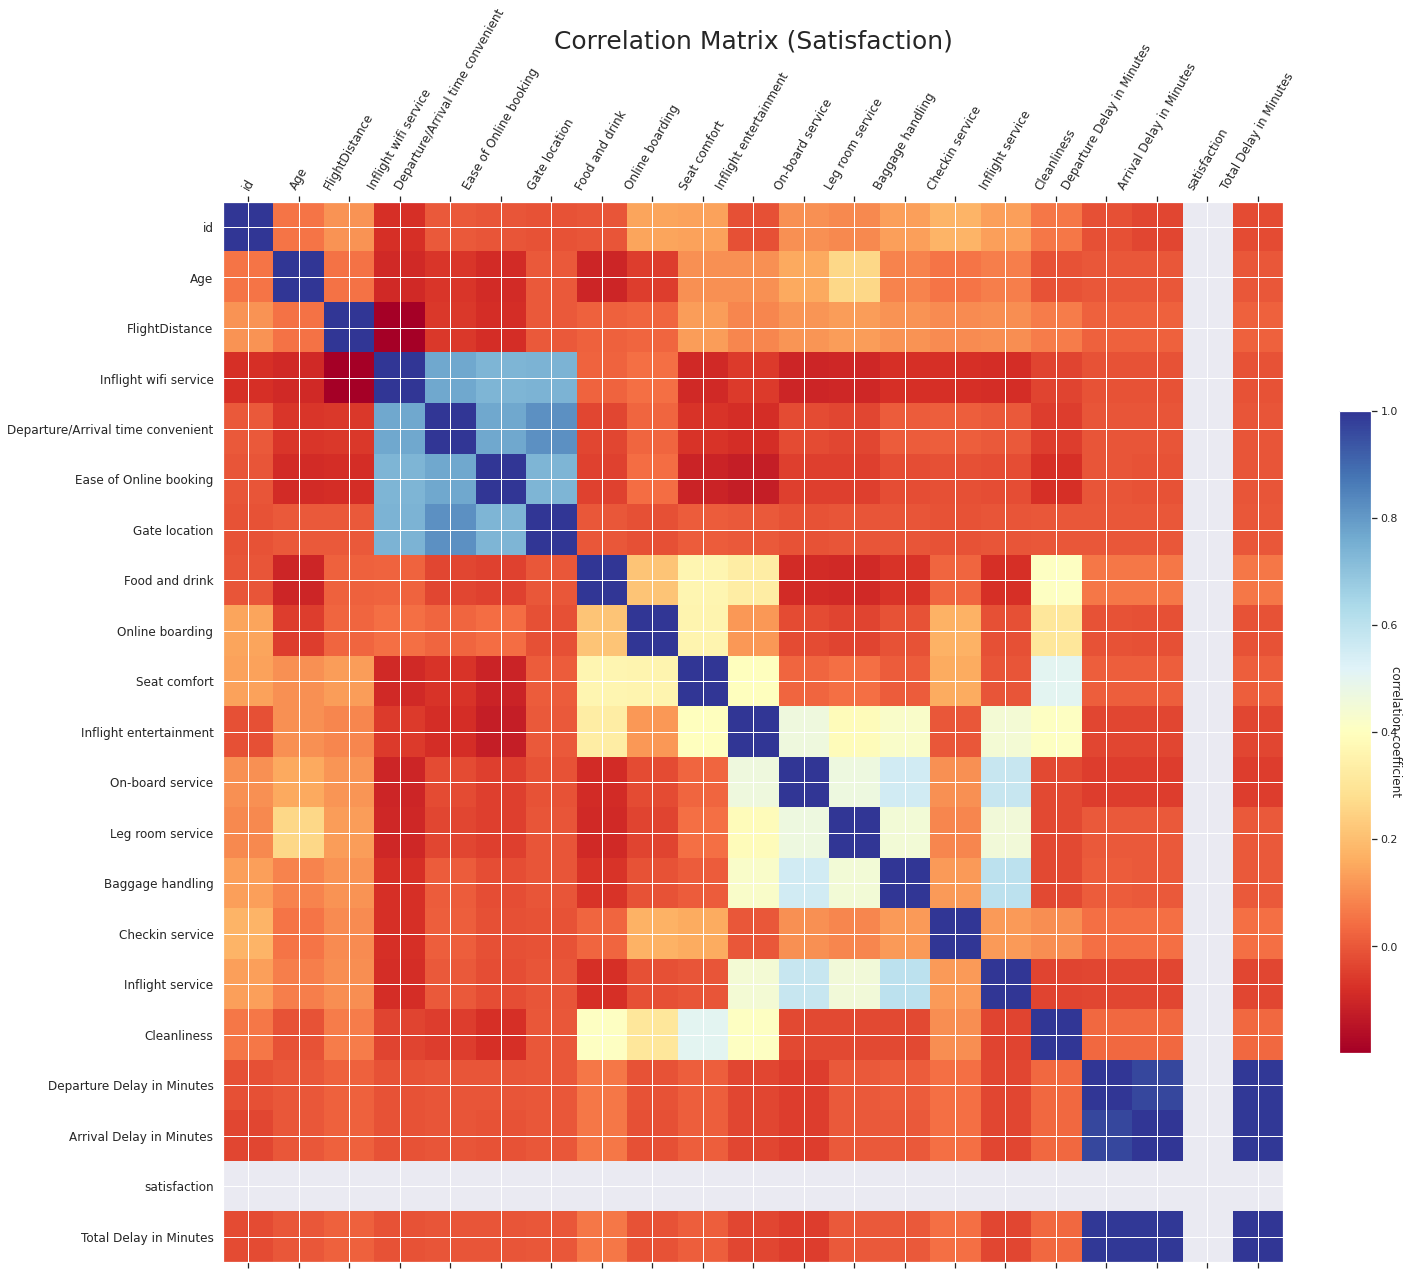

'\nsource: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas\n'

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')    # change the color

f = plt.figure(figsize=(25, 19))   # set the figure size
plt.matshow(df_satisfied.corr(), fignum=f.number, cmap=cm)
plt.xticks(range(df_satisfied.select_dtypes(['number']).shape[1]), df_satisfied.select_dtypes(['number']).columns, fontsize=12, rotation=60)
plt.yticks(range(df_satisfied.select_dtypes(['number']).shape[1]), df_satisfied.select_dtypes(['number']).columns, fontsize=12)
plt.title('Correlation Matrix (Satisfaction)', fontsize=25, pad=100);

cb = plt.colorbar(fraction=0.023, pad=0.04).set_label('correlation coefficient', rotation=270)  #add and adjust the color bar

plt.show()

"""
source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
"""

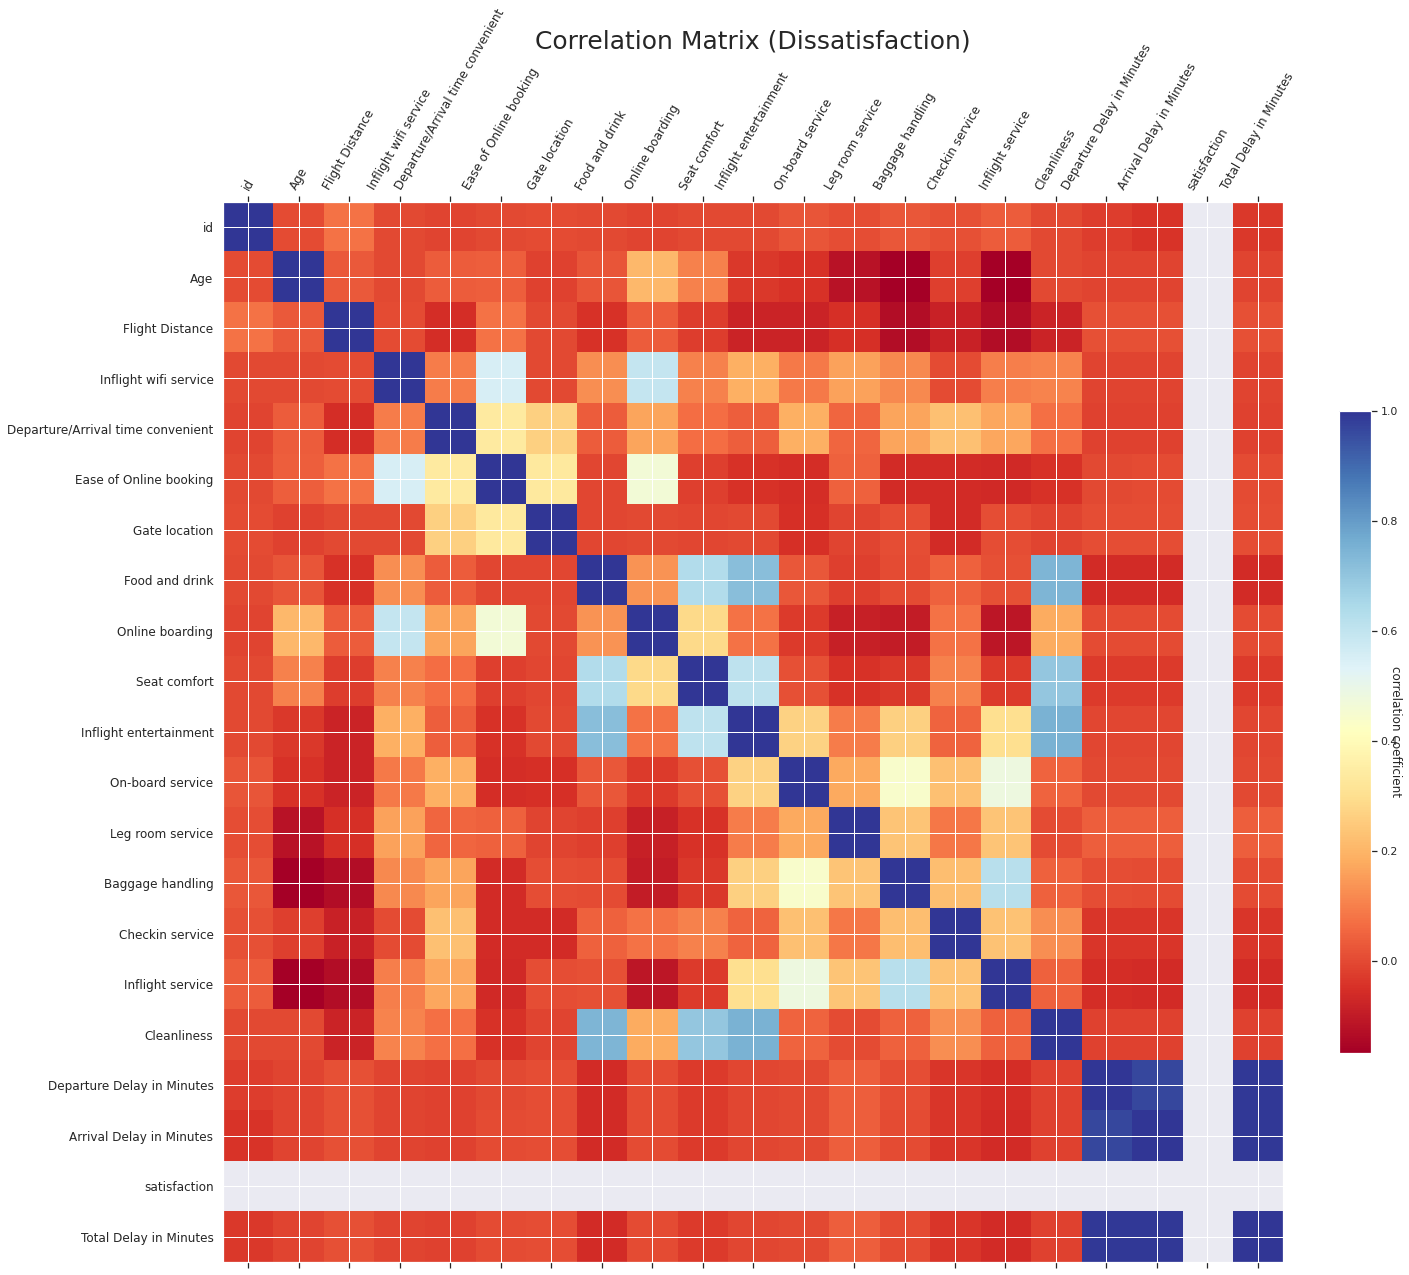

'\nsource: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas\n'

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')    # change the color

f = plt.figure(figsize=(25, 19))   # set the figure size
plt.matshow(df_dissatisfied.corr(), fignum=f.number, cmap=cm)
plt.xticks(range(df_dissatisfied.select_dtypes(['number']).shape[1]), df_dissatisfied.select_dtypes(['number']).columns, fontsize=12, rotation=60)
plt.yticks(range(df_dissatisfied.select_dtypes(['number']).shape[1]), df_dissatisfied.select_dtypes(['number']).columns, fontsize=12)
plt.title('Correlation Matrix (Dissatisfaction)', fontsize=25, pad=100);

cb = plt.colorbar(fraction=0.023, pad=0.04).set_label('correlation coefficient', rotation=270)  #add and adjust the color bar

plt.show()

"""
source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
"""

In [ ]:
df_satisfied.describe()

,id,Age,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes
count,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.000000,40639.0,40639.000000
mean,65740.353257,42.520362,1579.372426,3.362607,3.116538,3.224833,2.992643,3.560841,4.161913,4.025911,4.056128,3.906715,3.899062,4.006865,3.648835,4.007234,3.792416,12.665395,12.754694,1.0,25.420089
std,37174.843251,12.290399,1125.514023,1.388813,1.413031,1.395513,1.384431,1.214357,0.958135,1.096389,0.997400,1.096430,1.115902,1.064427,1.155697,1.059664,1.110806,35.553856,36.213312,0.0,71.138759
min,2.000000,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000
25%,33872.000000,34.000000,564.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.0,0.000000
50%,66273.000000,43.000000,1428.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,1.0,1.000000
75%,97643.500000,52.000000,2450.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,9.000000,1.0,17.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.0,2585.000000


##Classification: Decision Tree

In this section, we started to train the model to predict customer satisfaction. The first model that we chose was decision tree. 

In [ ]:
# Import libraries for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets

In [ ]:
X = df_new.drop(['satisfaction', 'id'], axis=1)

Y = df_new['satisfaction']
X

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Total Delay in Minutes,FlightDistanceClassification
0,0,0,13,0,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,43.0,1
1,0,1,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,7.0,1
2,1,0,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,20.0,1
4,0,0,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,0,1,34,1,1,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0.0,1
95415,0,0,23,1,1,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,0.0,1
95416,1,0,17,0,3,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0.0,1
95417,0,0,14,1,1,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(841)
# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Create Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")

decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(841)
# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Create Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")

decision_tree.fit(X_train, Y_train)

dot_data = tree.export_graphviz(decision_tree,
                                feature_names=X_train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

In [ ]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Online boarding <= 3.5\nentropy = 0.984\nsamples = 76335\nvalue = [43815, 32520]", fillcolor="#f8dfcc"] ;
1 [label="Inflight wifi service <= 3.5\nentropy = 0.54\nsamples = 37645\nvalue = [32985, 4660]", fillcolor="#e99355"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Class <= 1.5\nentropy = 0.365\nsamples = 34140\nvalue = [31761, 2379]", fillcolor="#e78a48"] ;
1 -> 2 ;
3 [label="Inflight entertainment <= 3.5\nentropy = 0.716\nsamples = 9901\nvalue = [7952, 1949]", fillcolor="#eba06a"] ;
2 -> 3 ;
4 [label="Gate location <= 3.5\nentropy = 0.381\nsamples = 6955\nvalue = [6440, 515]", fillcolor="#e78b49"] ;
3 -> 4 ;
5 [label="entropy = 0.503\nsamples = 4535\nvalue = [4032, 503]", fillcolor="#e89152"] ;
4 -> 5 ;
6 [label="entropy = 0.045\nsamples = 2420\nvalue = [2408, 12]", fillcolor="#e5823a"] ;
4 -> 6 ;
7 [label="CustomerTyp

In [ ]:
print ( "Accuracy on training = %.4f" % metrics.accuracy_score(decision_tree.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(decision_tree.predict(X_test), Y_test) )

Accuracy on training = 0.9143
Accuracy on test = 0.9112


In [ ]:
# We based on the feature and chosse the feature again
# Set X and Y values
# This step is similar to PCA but in maual way. Personally, I will apply PCA directly to indicate the feature improtance.

X = df_new[['Gate location','CustomerType','TypeofTravel','Class','Inflight wifi service',
            'Gate location','Inflight entertainment','Leg room service',
            'Baggage handling','Checkin service','Inflight service',
            'FlightDistanceClassification']]

Y = df_new['satisfaction']
Y.head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: satisfaction, dtype: int64

In [ ]:
np.random.seed(841)
# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Create Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")

decision_tree.fit(X_train, Y_train)

dot_data = tree.export_graphviz(decision_tree,
                                feature_names=X_train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)

In [ ]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Class <= 1.5\nentropy = 0.984\nsamples = 76335\nvalue = [43815, 32520]", fillcolor="#f8dfcc"] ;
1 [label="Inflight entertainment <= 3.5\nentropy = 0.898\nsamples = 37039\nvalue = [11632, 25407]", fillcolor="#94caf1"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Inflight wifi service <= 3.5\nentropy = 0.92\nsamples = 13074\nvalue = [8687, 4387]", fillcolor="#f2c19d"] ;
1 -> 2 ;
3 [label="Gate location <= 3.5\nentropy = 0.73\nsamples = 10273\nvalue = [8174, 2099]", fillcolor="#eca16c"] ;
2 -> 3 ;
4 [label="Checkin service <= 2.5\nentropy = 0.869\nsamples = 7193\nvalue = [5108, 2085]", fillcolor="#f0b48a"] ;
3 -> 4 ;
5 [label="entropy = 0.406\nsamples = 2196\nvalue = [2018, 178]", fillcolor="#e78c4a"] ;
4 -> 5 ;
6 [label="entropy = 0.959\nsamples = 4997\nvalue = [3090, 1907]", fillcolor="#f5cfb3"] ;
4 -> 6 ;
7 [label="Customer

In [ ]:
# Webgraphviz for Decision Tree Generation: http://www.jdolivet.byethost13.com/Logiciels/WebGraphviz/

In [ ]:
print ( "Accuracy on training = %.4f" % metrics.accuracy_score(decision_tree.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(decision_tree.predict(X_test), Y_test) )

Accuracy on training = 0.9150
Accuracy on test = 0.9150


##Classification: Logistic Regression

Then, we chose another model to increase the prediction precision. Logistic regression is very suitable to classify the binary value. In our case, that will be satisfied and unsatisfied. 

In [ ]:
X = df_new[['Age', 'Total Delay in Minutes', 'Online boarding', 'Inflight wifi service', 'TypeofTravel', 'Cleanliness', 'Class', 'Gate location', 'Leg room service', 'Inflight entertainment', 'CustomerType']]
#Could include also: 'Flight Distance Classification', 'Arrival Delay in Minutes', 'Checkin service'
Y = df_new['satisfaction']

np.random.seed(841)
# Split the data into train and test pieces for both X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# Model
from sklearn.linear_model import LogisticRegression
# Fit the model
model = LogisticRegression(solver="liblinear")
model.fit(X, Y)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(model.predict(X_test), Y_test) )

Accuracy on training = 0.8879
Accuracy on test = 0.8873


In [ ]:
#testing how good the model is
print("Accuracy:",metrics.accuracy_score(model.predict(X_test), Y_test)) 
print("Precision:",metrics.precision_score(model.predict(X_test), Y_test)) 
print("Recall:",metrics.recall_score(model.predict(X_test), Y_test))
print("F1 score:",metrics.f1_score(model.predict(X_test), Y_test))

Accuracy: 0.8873401802557116
Precision: 0.8667323562015027
Recall: 0.8682294879703887
F1 score: 0.8674802761341224


In [ ]:
from sklearn.model_selection import cross_val_score
# Model cross validation
model_cv = LogisticRegression(solver="liblinear")

print ( "Cross validation accuracy = %.3f" % np.mean(cross_val_score(model, X, Y, cv=5)) )

Cross validation accuracy = 0.888


In [ ]:
#create test customer out of our test data with x criterias
test_customer = X_test[['Age', 'Total Delay in Minutes', 'Online boarding', 'Inflight wifi service', 'TypeofTravel', 'Cleanliness', 'Class', 'Gate location', 'Leg room service', 'Inflight entertainment', 'CustomerType']][0:1] 
test_customer

,Age,Total Delay in Minutes,Online boarding,Inflight wifi service,TypeofTravel,Cleanliness,Class,Gate location,Leg room service,Inflight entertainment,CustomerType
75978,23,16.0,1,1,1,1,1,3,4,1,0


In [ ]:
#prediction satisfied/dissatisdied (0,1) 0=dissatisfied, 1= satisfied
pred = model.predict_proba(test_customer) #predicts that customer is 75.98% satisfied
print(pred)

[[0.97529746 0.02470254]]


In [ ]:
Y_test.iloc[0:1]
#79446 is satisfied, like the model predicted

75978    0
Name: satisfaction, dtype: int64

In [ ]:
logreg = LogisticRegression(max_iter=500) #model

#fit the model with data
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)

In [ ]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix
#12594 &8306 are actual predictions and 2188 & 2812 are incorrect predictions

array([[9892, 1073],
       [1081, 7038]])

Text(0.5, 12.5, 'Predicted label')

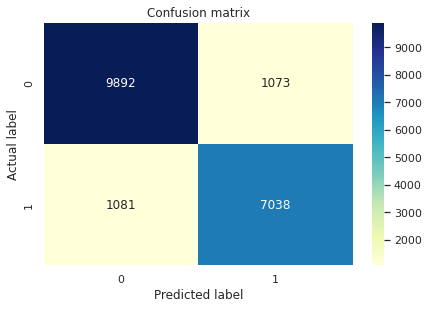

In [ ]:
class_names=['neutral or dissatisfied','satisfied'] # name  of classes (0,1)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##Advanced Classification

In this section, we will apply more advanced method to improve our classification model with **Principle Component Analysis** and **Neural Network**.

In [ ]:
"""
references: 
https://towardsdatascience.com/visualising-the-classification-power-of-data-54f5273f640
"""

# Dimentionality reduction with PCA
df_pca = df_new

df_pca = df_pca.reset_index(drop=True) #reset the index.

# before the pca, we need scaling our data.
from sklearn.preprocessing import StandardScaler

df_new2 = pd.DataFrame(df_new.columns)   
cols = df_new2[0].tolist()
data = []
for i in cols:
    data.append(i)
data.remove('satisfaction') # delete the column named "Satisfaction"


print(data) # print the columns to make sure the satisfaction is deleted.

# separating out the features
x_scaler = df_pca.loc[:, data].values
# separating out the target
y_scaler = df_pca.loc[:,['satisfaction']].values
# standardizing the features
X_scaler = StandardScaler().fit_transform(x_scaler)

X_scaler # print the scaling data

['id', 'Gender', 'CustomerType', 'Age', 'TypeofTravel', 'Class', 'FlightDistance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes', 'FlightDistanceClassification']


array([[ 0.13002732, -1.01324025, -0.43777862, ...,  0.06774352,
         0.16607595, -0.6369681 ],
       [-1.61307636, -1.01324025,  2.28425957, ..., -0.24107918,
        -0.30473882, -0.6369681 ],
       [ 1.19679339,  0.98635379, -0.43777862, ..., -0.39549053,
        -0.39628613, -0.6369681 ],
       ...,
       [-0.73977138,  0.98635379, -0.43777862, ..., -0.39549053,
        -0.39628613, -0.6369681 ],
       [ 0.66303564, -1.01324025, -0.43777862, ..., -0.39549053,
        -0.39628613, -0.6369681 ],
       [-0.81674898,  0.98635379, -0.43777862, ..., -0.39549053,
        -0.39628613, -0.6369681 ]])

In [ ]:


from sklearn.decomposition import PCA
pca = PCA(n_components = 15)  # select the top 15 principal components.
principalComponents = pca.fit_transform(X_scaler)  # fit into the function.


# create the data frame containing those principla components.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4',
                          'pc 5', 'pc 6', 'pc 7', 'pc 8',
                          'pc 9', 'pc 10', 'pc 11', 'pc 12',
                          'pc 13', 'pc 14', 'pc 15'])

principalDf

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,pc 11,pc 12,pc 13,pc 14,pc 15
0,-1.309610,0.222496,-0.091388,-2.804467,1.022376,-0.605415,1.353157,-0.075644,-0.772281,-0.978823,1.133569,-0.510279,-0.765011,0.328041,0.299438
1,3.175036,-0.745580,-0.115244,1.029655,-1.773402,3.096652,-0.667864,1.829121,-0.510779,-0.390084,0.796129,1.036523,-0.327305,-1.051091,-0.583885
2,-2.253227,-0.446985,1.591008,-1.103747,1.389233,0.608741,-0.142028,-1.587922,0.345871,0.046348,0.595977,-0.541867,-1.359502,0.088765,0.092918
3,1.716727,-0.369774,-1.934975,1.307165,-1.262003,1.036305,0.368163,1.227402,1.367781,0.923115,-0.349152,1.280957,-2.201597,-0.428593,-0.169583
4,-1.035945,-0.580240,-0.034774,0.326765,0.808787,0.063250,-1.902440,-0.545471,-1.808027,1.152713,0.104507,0.167001,-0.725135,-0.395150,-0.294708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,-0.556327,-0.693511,0.712680,-1.206243,0.225971,2.204119,0.059017,-0.670671,-1.452754,-0.748583,-0.320082,-1.142668,0.377250,-0.288558,0.377210
95415,-2.445855,-0.527280,-1.389028,-0.931972,-0.964515,0.711044,0.092584,-0.074368,-1.098932,-0.828876,0.180090,0.679198,-1.424166,-0.366652,0.388157
95416,2.347648,-1.081312,-0.980398,-1.423272,-1.707850,-1.324729,1.613545,-0.538458,1.326728,-1.156079,-1.363390,0.474435,-0.797528,0.237583,-0.063130
95417,-1.348531,-0.605604,0.059552,-0.706417,-0.041411,0.808660,0.894891,-0.569741,-1.218911,-0.733147,0.539456,-1.294630,-1.648758,-0.999919,0.333223


In [ ]:
# put the satisfaction back with index order.
finalDf = pd.concat([principalDf, df_pca[['satisfaction']]], axis = 1)

finalDf

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10,pc 11,pc 12,pc 13,pc 14,pc 15,satisfaction
0,-1.309610,0.222496,-0.091388,-2.804467,1.022376,-0.605415,1.353157,-0.075644,-0.772281,-0.978823,1.133569,-0.510279,-0.765011,0.328041,0.299438,0
1,3.175036,-0.745580,-0.115244,1.029655,-1.773402,3.096652,-0.667864,1.829121,-0.510779,-0.390084,0.796129,1.036523,-0.327305,-1.051091,-0.583885,0
2,-2.253227,-0.446985,1.591008,-1.103747,1.389233,0.608741,-0.142028,-1.587922,0.345871,0.046348,0.595977,-0.541867,-1.359502,0.088765,0.092918,1
3,1.716727,-0.369774,-1.934975,1.307165,-1.262003,1.036305,0.368163,1.227402,1.367781,0.923115,-0.349152,1.280957,-2.201597,-0.428593,-0.169583,0
4,-1.035945,-0.580240,-0.034774,0.326765,0.808787,0.063250,-1.902440,-0.545471,-1.808027,1.152713,0.104507,0.167001,-0.725135,-0.395150,-0.294708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,-0.556327,-0.693511,0.712680,-1.206243,0.225971,2.204119,0.059017,-0.670671,-1.452754,-0.748583,-0.320082,-1.142668,0.377250,-0.288558,0.377210,0
95415,-2.445855,-0.527280,-1.389028,-0.931972,-0.964515,0.711044,0.092584,-0.074368,-1.098932,-0.828876,0.180090,0.679198,-1.424166,-0.366652,0.388157,1
95416,2.347648,-1.081312,-0.980398,-1.423272,-1.707850,-1.324729,1.613545,-0.538458,1.326728,-1.156079,-1.363390,0.474435,-0.797528,0.237583,-0.063130,0
95417,-1.348531,-0.605604,0.059552,-0.706417,-0.041411,0.808660,0.894891,-0.569741,-1.218911,-0.733147,0.539456,-1.294630,-1.648758,-0.999919,0.333223,1


(-1.3398037457286758, 69.84096544639999)

<Figure size 1800x1800 with 0 Axes>

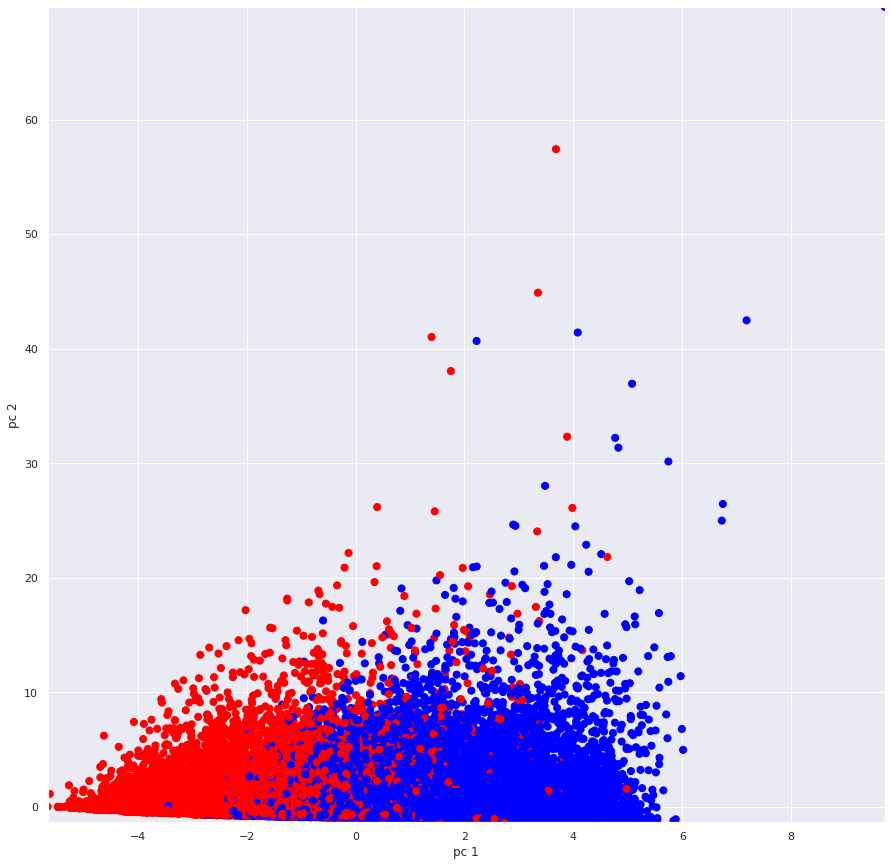

In [ ]:
# take a look the PCA classification with pc1 and pc2 to see the performance

%matplotlib inline

plt.figure(figsize=[25,25])
    
# Color
color = ["blue" if x == 0 else "red" for x in finalDf['satisfaction']]
    
# Plot and label
plt.figure(figsize=(15,15))
plt.scatter(finalDf['pc 1'], finalDf['pc 2'], c=color, s=50)
plt.xlabel('pc 1')
plt.ylabel('pc 2')
plt.xlim([min(finalDf['pc 1'] ) , max(finalDf['pc 1'] ) ])
plt.ylim([min(finalDf['pc 2'] ) , max(finalDf['pc 2'] ) ])

In [ ]:
# using PCA in logistic regression again.

X_pca = finalDf[['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8',
                          'pc 9', 'pc 10', 'pc 11', 'pc 12',
                          'pc 13', 'pc 14', 'pc 15']]
#Could include also: 'Flight Distance Classification', 'Arrival Delay in Minutes', 'Checkin service'
Y_pca = finalDf['satisfaction']

np.random.seed(15)

# Split the data into train and test pieces for both X_pca and Y_pca
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_pca, test_size=0.2, random_state=32)

# import the logistic model 
from sklearn.linear_model import LogisticRegression

# Fit the model and rename it as "lr"
lr = LogisticRegression(solver="liblinear", max_iter=200)
lr.fit(X_train, Y_train)

print ( "Accuracy on training = %.4f" % metrics.accuracy_score(lr.predict(X_train), Y_train) )
print ( "Accuracy on test = %.4f" % metrics.accuracy_score(lr.predict(X_test), Y_test) )
print("Accuracy:",metrics.accuracy_score(lr.predict(X_test), Y_test)) 
print("Precision:",metrics.precision_score(lr.predict(X_test), Y_test)) 
print("Recall:",metrics.recall_score(lr.predict(X_test), Y_test))
print("F1 score:",metrics.f1_score(lr.predict(X_test), Y_test))

Accuracy on training = 0.8897
Accuracy on test = 0.8876
Accuracy: 0.8876021798365122
Precision: 0.8690274072277467
Recall: 0.87061110436156
F1 score: 0.8698185349274747


In [ ]:
from sklearn.model_selection import cross_val_score
# Model cross validation
print ( "Cross validation accuracy = %.3f" % np.mean(cross_val_score(lr, X_pca, Y_pca, cv=5)) )

Cross validation accuracy = 0.889


<Figure size 432x288 with 0 Axes>

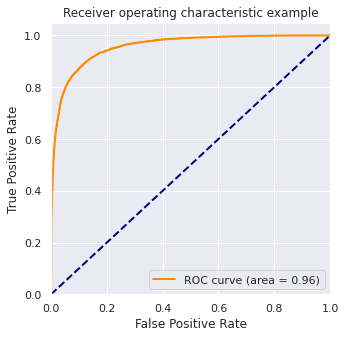

In [ ]:

"""
references:
https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
"""
# plot the ROC curve to see the area, the bigger the better!

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = lr.decision_function(X_test)
fpr,tpr,threshold = roc_curve(Y_test, y_score)
roc_auc = auc(fpr,tpr) ###calculate auc value
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #draw a line from (0, 0) to (1, 1). The first braket means

# x-asis from 0 to 1 and so on.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [ ]:

# apply MLP to see how we can make the better classifier.
# WARNING: it will take around 4 mins to run
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', activation='relu', alpha=1e-3, hidden_layer_sizes=(100, 10), random_state=89,
                   max_iter=500, verbose=10, learning_rate_init=0.0001)
mlp.fit(X_train, Y_train)

Iteration 1, loss = 0.46058358
Iteration 2, loss = 0.27301582
Iteration 3, loss = 0.23017278
Iteration 4, loss = 0.21428300
Iteration 5, loss = 0.20469838
Iteration 6, loss = 0.19767969
Iteration 7, loss = 0.19206820
Iteration 8, loss = 0.18748635
Iteration 9, loss = 0.18353272
Iteration 10, loss = 0.18009820
Iteration 11, loss = 0.17707372
Iteration 12, loss = 0.17437305
Iteration 13, loss = 0.17205474
Iteration 14, loss = 0.16993060
Iteration 15, loss = 0.16809041
Iteration 16, loss = 0.16643664
Iteration 17, loss = 0.16498792
Iteration 18, loss = 0.16364076
Iteration 19, loss = 0.16239519
Iteration 20, loss = 0.16125314
Iteration 21, loss = 0.16025484
Iteration 22, loss = 0.15927383
Iteration 23, loss = 0.15840945
Iteration 24, loss = 0.15753377
Iteration 25, loss = 0.15669193
Iteration 26, loss = 0.15598196
Iteration 27, loss = 0.15522273
Iteration 28, loss = 0.15458011
Iteration 29, loss = 0.15388417
Iteration 30, loss = 0.15328029
Iteration 31, loss = 0.15266194
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 10),
              learning_rate_init=0.0001, max_iter=500, random_state=89,
              verbose=10)

The test score is:  0.9455564871096206


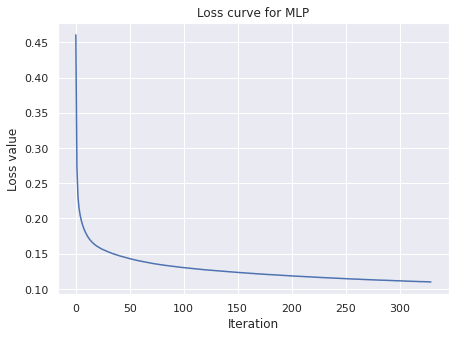

In [ ]:
# plot the loss curve for MLP, the lose value should gradually decrease
plt.figure(figsize=(7,5))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss value')
plt.title('Loss curve for MLP')
print("The test score is: ",mlp.score(X_test, Y_test))

In [ ]:
# assess the model
print("Accuracy:",metrics.accuracy_score(mlp.predict(X_test), Y_test)) 
print("Precision:",metrics.precision_score(mlp.predict(X_test), Y_test)) 
print("Recall:",metrics.recall_score(mlp.predict(X_test), Y_test))
print("F1 score:",metrics.f1_score(mlp.predict(X_test), Y_test))

Accuracy: 0.9455564871096206
Precision: 0.9249333009944215
Recall: 0.9478066360134212
F1 score: 0.9362302829435956


In [ ]:
# Model cross validation
# WARNING this code take 25 mins to run!!!!
#---------WARNING------------#
"""
print ( "Cross validation accuracy = %.3f" % np.mean(cross_val_score(mlp, X_pca, Y_pca, cv=5)) )
"""
## Cross validation accuracy = 0.942

'\nprint ( "Cross validation accuracy = %.3f" % np.mean(cross_val_score(mlp, X_pca, Y_pca, cv=5)) )\n'

##Clustering

Finally, according to the project requirement, we apply clustering to cluster the customers. Then, we visualize each cluster to spot the differences. Finally, we made the conclusions in our project paper. 

In [ ]:
df_new

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,FlightDistanceClassification
0,0,0,13,0,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,43.0,1
1,0,1,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,7.0,1
2,1,0,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0,1
3,1,0,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,20.0,1
4,0,0,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95414,0,1,34,1,1,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0,0.0,1
95415,0,0,23,1,1,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1,0.0,1
95416,1,0,17,0,3,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0,0.0,1
95417,0,0,14,1,1,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1,0.0,1


In [ ]:
# Import the libraries we will be using
from io import StringIO
import requests

from scipy.spatial.distance import pdist, squareform

from sklearn.cluster import KMeans
from scipy.spatial import distance

%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 8

np.random.seed(37)

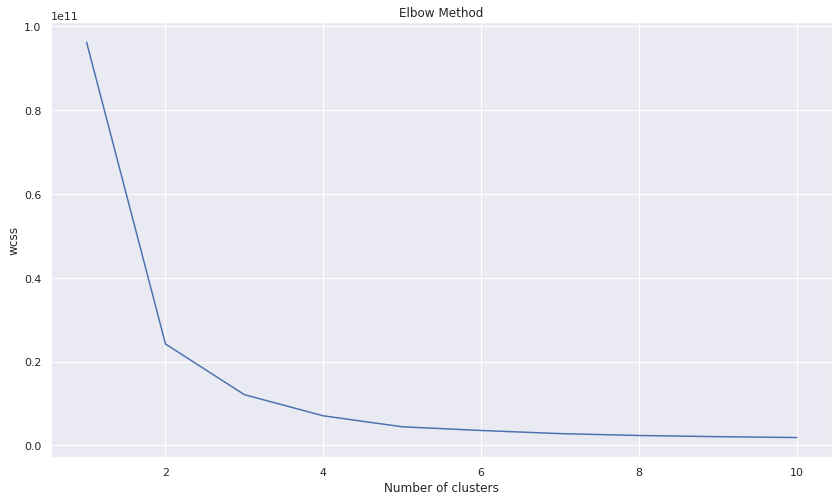

In [ ]:
#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_new)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
k_clusters = 2

model = KMeans(k_clusters)
model.fit(df_new)


KMeans(n_clusters=2)

In [ ]:
clusters = model.predict(df_new)

clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
print ("Records in our dataset (rows): ", len(df_new.index))
print ("Then we predict one cluster per record, which means a length of: ", len(model.predict(df_new)) )

Records in our dataset (rows):  95419
Then we predict one cluster per record, which means a length of:  95419


In [ ]:
#create table with customer and cluster
cluster_df = pd.DataFrame(list(zip(df_new.index,model.predict(df_new))), columns=['Customer','Cluster_predicted']) [0:95419]
cluster_df.head()

,Customer,Cluster_predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
#left join for cluster dataframe to df_new to add cluster to our overall df
merged_df = pd.merge(left = df_new, right = cluster_df, left_on=df_new.index, right_on='Customer')

In [ ]:
#show merged dataframe
merged_df.head()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,FlightDistanceClassification,Customer,Cluster_predicted
0,0,0,13,0,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,43.0,1,0,0
1,0,1,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,7.0,1,1,0
2,1,0,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0,1,2,0
3,1,0,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,20.0,1,3,0
4,0,0,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0.0,1,4,0


In [ ]:
#drop customer and save as df_new_cluster
df_new_cluster = merged_df.drop(['Customer'], axis = 1)

In [ ]:
#count how many customers are in each cluster
df_cluster = df_new_cluster.groupby(df_new_cluster.index)['Cluster_predicted'].unique().value_counts()
print(df_cluster)

[0]    68963
[1]    26456
Name: Cluster_predicted, dtype: int64


In [ ]:
#create for each cluster a dataframe
df_new_cluster0 = df_new_cluster[df_new_cluster.Cluster_predicted == 0] 
df_new_cluster1 = df_new_cluster[df_new_cluster.Cluster_predicted == 1] 

In [ ]:
#KPIs for cluster 0
df_new_cluster0.describe()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,FlightDistanceClassification,Cluster_predicted
count,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.000000,68963.0
mean,0.508954,0.210765,38.868640,0.614068,2.220684,684.302148,2.810101,3.272987,2.832127,2.981077,3.169033,3.179444,3.331192,3.274437,3.295289,3.270826,3.588518,3.237084,3.601801,3.222830,15.081522,15.578368,0.333251,30.659890,1.051680,0.0
std,0.500068,0.407855,15.576562,0.486818,0.926573,402.723197,1.227383,1.372791,1.266872,1.246429,1.341646,1.266796,1.341435,1.349037,1.298208,1.311090,1.180514,1.278812,1.171053,1.330893,37.660022,38.373862,0.471379,75.361693,0.221382,0.0
min,0.000000,0.000000,7.000000,0.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,0.000000,0.000000,26.000000,0.000000,1.000000,357.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,1.000000,0.000000,39.000000,1.000000,3.000000,600.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.0
75%,1.000000,0.000000,51.000000,1.000000,3.000000,957.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,14.000000,1.000000,25.000000,1.000000,0.0
max,2.000000,1.000000,85.000000,1.000000,3.000000,1654.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000,3176.000000,2.000000,0.0


In [ ]:
#KPIs for cluster 1
df_new_cluster1.describe()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay in Minutes,FlightDistanceClassification,Cluster_predicted
count,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.00000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.000000,26456.00000,26456.000000,26456.000000,26456.0
mean,0.500907,0.030655,42.273171,0.891480,1.264666,2624.834253,2.840981,3.038819,2.997808,2.997959,3.325597,3.711483,3.778273,3.661438,3.61967,3.665407,3.761226,3.434608,3.756237,3.481327,14.548118,14.818453,0.66741,29.366571,2.151497,1.0
std,0.500160,0.172384,13.164514,0.311042,0.661402,677.823267,1.315939,1.405838,1.364948,1.368268,1.268601,1.168553,1.167981,1.219115,1.22642,1.206550,1.131542,1.218748,1.141989,1.229216,39.860798,40.086149,0.47115,79.257777,0.358539,0.0
min,0.000000,0.000000,7.000000,0.000000,1.000000,1655.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.0
25%,0.000000,0.000000,33.000000,1.000000,1.000000,2060.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.0
50%,1.000000,0.000000,43.000000,1.000000,1.000000,2496.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,1.00000,2.000000,2.000000,1.0
75%,1.000000,0.000000,52.000000,1.000000,1.000000,3164.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.00000,23.000000,2.000000,1.0
max,2.000000,1.000000,85.000000,1.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.00000,2585.000000,3.000000,1.0


In [ ]:
#create another dataframe with only describing characteristics
df_new2 = df_new.drop(['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness','Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total Delay in Minutes'], axis = 1)

In [ ]:
df_new2.head()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,satisfaction,FlightDistanceClassification
0,0,0,13,0,2,460,0,1
1,0,1,25,1,1,235,0,1
2,1,0,26,1,1,1142,1,1
3,1,0,25,1,1,562,0,1
4,0,0,61,1,1,214,1,1


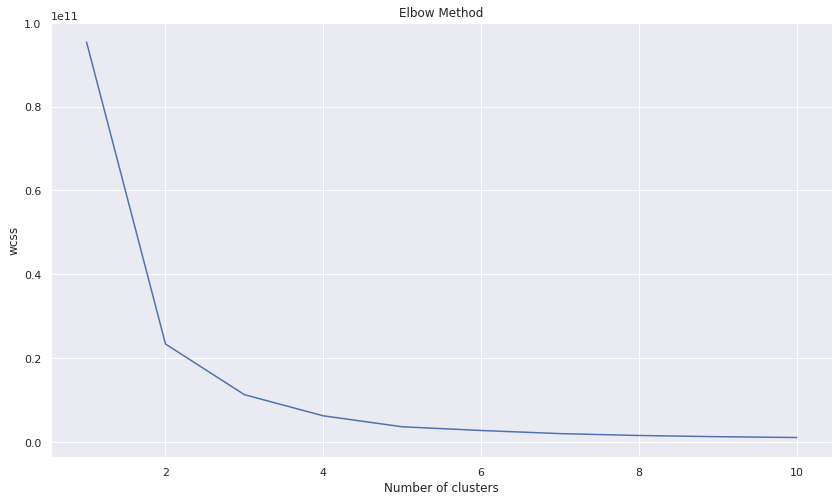

In [ ]:
#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_new2)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#run new cluster model
k2_clusters = 2

model2 = KMeans(k2_clusters)
model2.fit(df_new2)


KMeans(n_clusters=2)

In [ ]:
clusters2 = model2.predict(df_new2)

clusters2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
#create table with customer and cluster for new results
cluster2_df = pd.DataFrame(list(zip(df_new2.index,model2.predict(df_new2))), columns=['Customer','Cluster_predicted']) [0:103599]
cluster2_df.head()

,Customer,Cluster_predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
#left join for cluster dataframe to df_new to add cluster to our overall df
merged_df2 = pd.merge(left = df_new2, right = cluster2_df, left_on=df_new2.index, right_on='Customer')

In [ ]:
#show merged dataframe
merged_df2.head()

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,satisfaction,FlightDistanceClassification,Customer,Cluster_predicted
0,0,0,13,0,2,460,0,1,0,0
1,0,1,25,1,1,235,0,1,1,0
2,1,0,26,1,1,1142,1,1,2,0
3,1,0,25,1,1,562,0,1,3,0
4,0,0,61,1,1,214,1,1,4,0


In [ ]:
#drop customer and save as df_new_cluster
df_new2_cluster = merged_df2.drop(['Customer'], axis = 1)

In [ ]:
#count how many customers are in each cluster
df2_cluster = df_new2_cluster.groupby(df_new2_cluster.index)['Cluster_predicted'].unique().value_counts()
print(df2_cluster)

[0]    68963
[1]    26456
Name: Cluster_predicted, dtype: int64


--> Same result and therefore the conclusion that cluster model could not be improved

**Cluster analysis / interpretation of results**

In [ ]:
# create two lists with titels and means from "cluster 0 data frame" for bar-chart 

X_bar0 = []
Z = 0
for i in df_new_cluster0.head(0): 
  Z = Z +1
  if Z > 6 and Z < 21:
    X_bar0.append(i)
  if Z == 25: 
      X_bar0.append(i)

Y_bar0 = []
Z = 0
for i in df_new_cluster0.mean(): 
  Z = Z +1
  if Z > 6 and Z < 21:
    Y_bar0.append(i)
  if Z == 25: 
    Y_bar0.append(i)

#check if lists are correct:
print (X_bar0)
print (Y_bar0)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'FlightDistanceClassification']
[2.8101010686890073, 3.272986964024187, 2.8321273726491016, 2.9810768093035396, 3.169032669692444, 3.1794440497078145, 3.3311920885112305, 3.2744370169511186, 3.2952887780403985, 3.2708263851630583, 3.5885184809245536, 3.2370836535533547, 3.6018009657352494, 3.2228296332816146, 1.0516798863158505]


In [ ]:
# create two lists with titels and means from "cluster 1 data frame" for bar-chart 

X_bar1 = []
Z = 0
for i in df_new_cluster1.head(0): 
  Z = Z +1
  if Z > 6 and Z < 21:
    X_bar1.append(i)
  if Z == 25: 
      X_bar1.append(i)

Y_bar1 = []
Z = 0
for i in df_new_cluster1.mean(): 
  Z = Z +1
  if Z > 6 and Z < 21:
    Y_bar1.append(i)
  if Z == 25: 
    Y_bar1.append(i)

#check if lists are correct:
print (X_bar1)
print (Y_bar1)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'FlightDistanceClassification']
[2.8409812518899304, 3.0388191714544903, 2.9978076806773513, 2.9979588751133956, 3.3255972180223767, 3.711483217417599, 3.778273359540369, 3.6614378590867855, 3.6196703961294223, 3.66540671303296, 3.761226186876323, 3.434608406410644, 3.7562367704868462, 3.481327487148473, 2.151496824916843]


(0.5, 4.0)

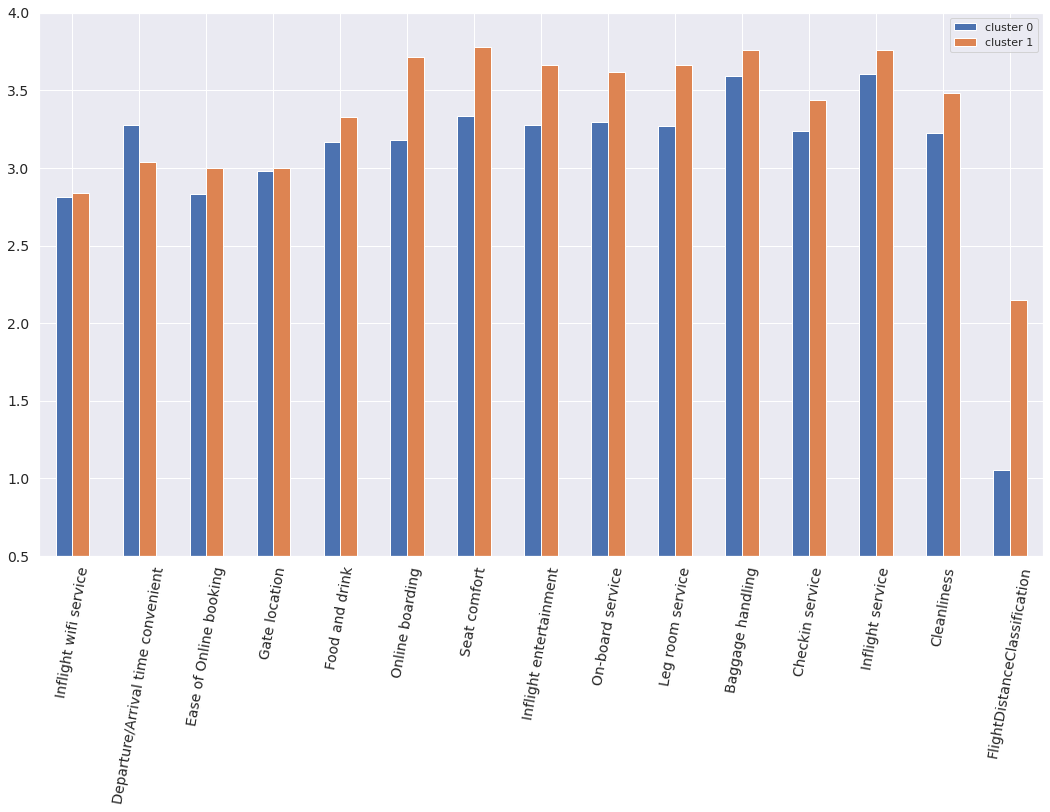

In [ ]:
df = pd.DataFrame({'cluster 0': Y_bar0,
                   'cluster 1': Y_bar1,}, index=X_bar0)
                  
ax = df.plot.bar(rot=80, figsize= (18,10), fontsize=14)
plt.ylim(0.5,4.0)

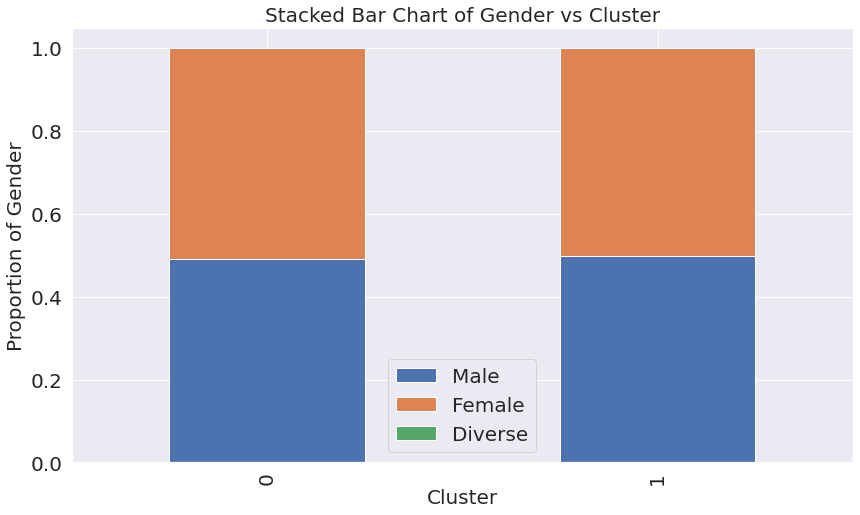

In [ ]:
table=pd.crosstab(df_new_cluster.Cluster_predicted,df_new_cluster.Gender)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=20)
plt.title('Stacked Bar Chart of Gender vs Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('Proportion of Gender', fontsize=20)
plt.legend(['Male', 'Female', 'Diverse'], fontsize=20, loc='lower center')
plt.savefig('Gender vs Cluster')

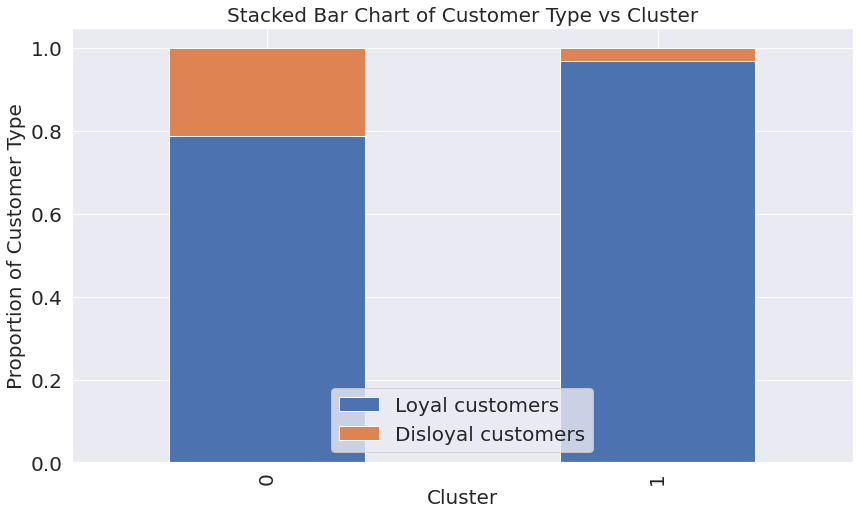

In [ ]:
table=pd.crosstab(df_new_cluster.Cluster_predicted,df_new_cluster.CustomerType)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=20)
plt.title('Stacked Bar Chart of Customer Type vs Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('Proportion of Customer Type', fontsize=20)
plt.legend(['Loyal customers', 'Disloyal customers'], fontsize=20, loc='lower center')
plt.savefig('Customer Type vs Cluster', fontsize=20)

**Result: Most of customers with customer type 1 (disloyal) are in cluster 0 but in total the majority of customers are of customer type 0 in both clusters**

In [ ]:
#count how many "Customer Types" are in cluster 1
df_CustomerType = df_new_cluster1.groupby(df_new_cluster1.index)['CustomerType'].unique().value_counts()
print(df_CustomerType)

[0]    25645
[1]      811
Name: CustomerType, dtype: int64


In [ ]:
#count how many "Customer Types" are in cluster 0
df_CustomerType = df_new_cluster0.groupby(df_new_cluster0.index)['CustomerType'].unique().value_counts()
print(df_CustomerType)

[0]    54428
[1]    14535
Name: CustomerType, dtype: int64


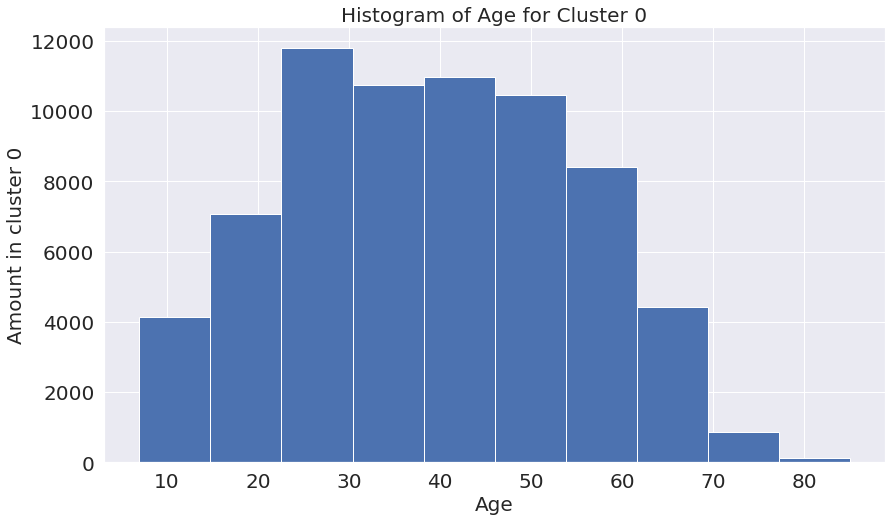

In [ ]:
df_new_cluster0.Age.hist(xlabelsize = 20, ylabelsize = 20)
plt.title('Histogram of Age for Cluster 0', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in cluster 0', fontsize=20)
plt.savefig('hist_age')

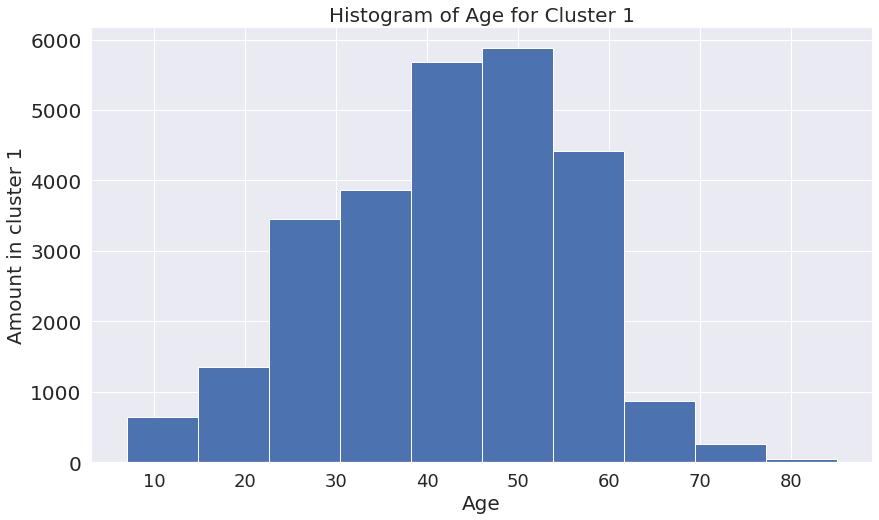

In [ ]:
df_new_cluster1.Age.hist(xlabelsize = 18, ylabelsize = 20)
plt.title('Histogram of Age for Cluster 1', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Amount in cluster 1', fontsize=20)
plt.savefig('hist_age')

**Result: The customers in Cluster 0 are younger**

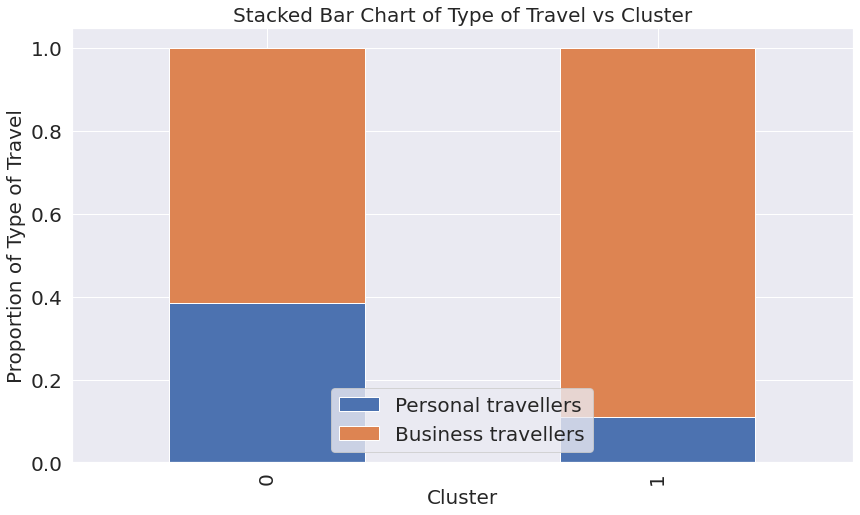

In [ ]:
table=pd.crosstab(df_new_cluster.Cluster_predicted,df_new_cluster.TypeofTravel)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize=20)
plt.title('Stacked Bar Chart of Type of Travel vs Cluster', fontsize=20)
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('Proportion of Type of Travel', fontsize=20)
plt.legend(['Personal travellers', 'Business travellers'], fontsize=20, loc='lower center')
plt.savefig('Type of Travel vs Cluster')

**Result: Most of the customers that traveled personal are in cluster 0**

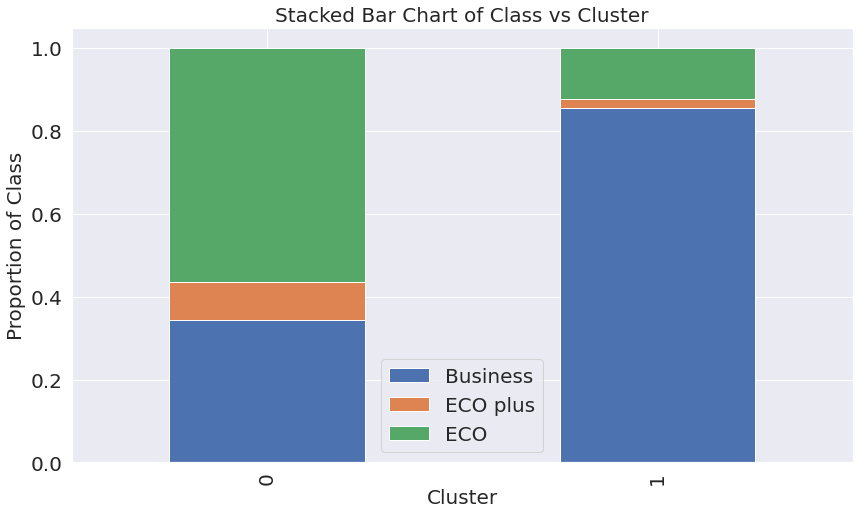

In [ ]:
table=pd.crosstab(df_new_cluster.Cluster_predicted,df_new_cluster.Class)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,fontsize = 20)
plt.title('Stacked Bar Chart of Class vs Cluster',fontsize = 20)
plt.xlabel('Cluster',fontsize = 20)
plt.ylabel('Proportion of Class',fontsize = 20)
plt.legend(['Business', 'ECO plus', 'ECO'], fontsize=20, loc='lower center')
plt.savefig('Class vs Cluster')

**Result: Most of customers with Class 2 (eco plus) and 3 (eco) are in Cluster 0**

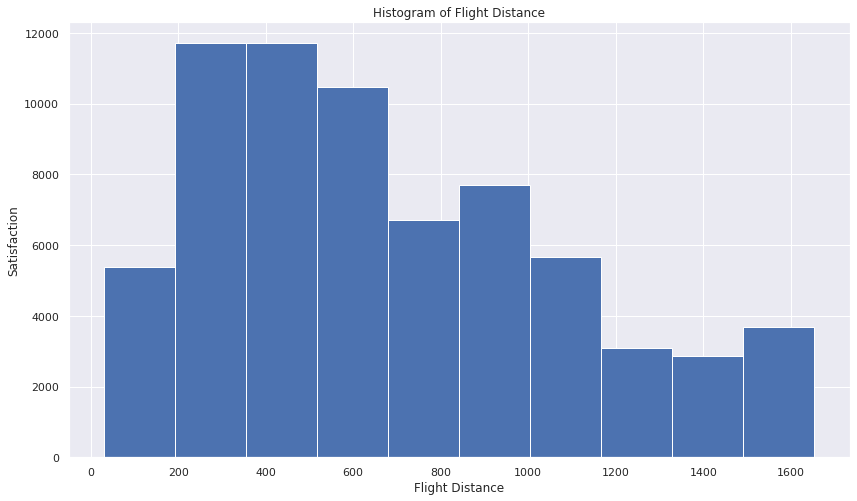

In [ ]:
df_new_cluster0.FlightDistance.hist()
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.savefig('hist_Fligth Distance')

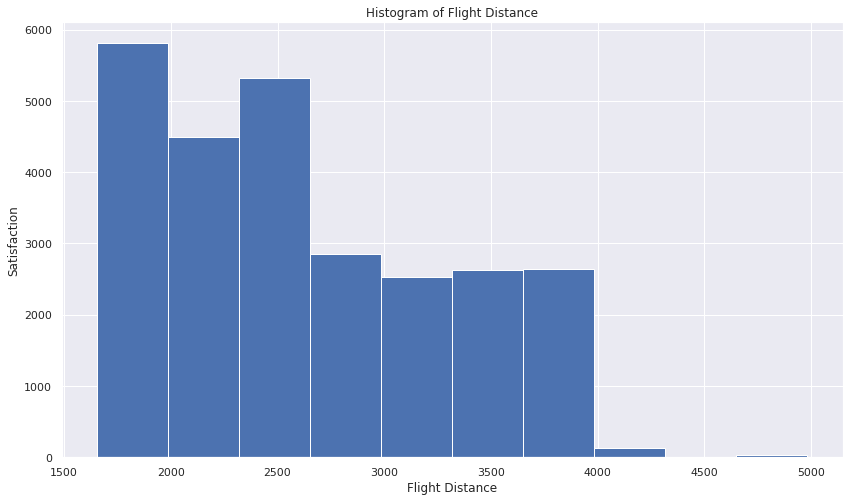

In [ ]:
df_new_cluster1.FlightDistance.hist()
plt.title('Histogram of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.savefig('hist_Fligth Distance')

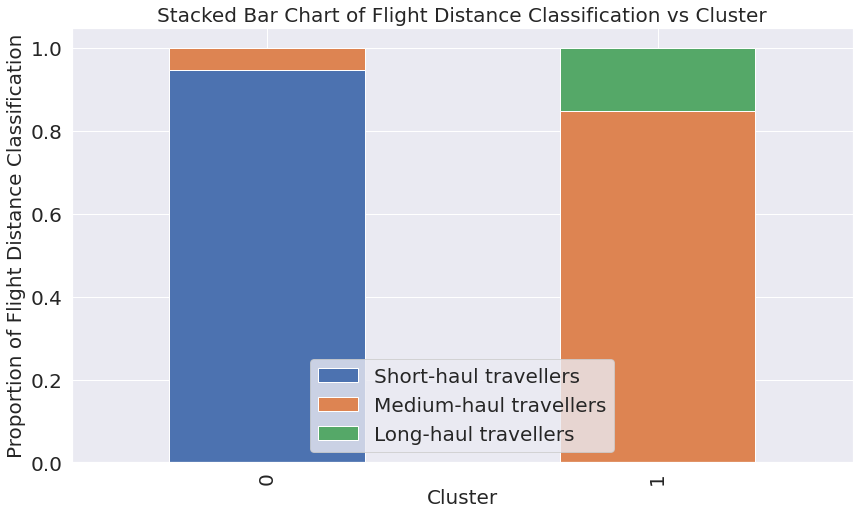

In [ ]:
table=pd.crosstab(df_new_cluster.Cluster_predicted,df_new_cluster.FlightDistanceClassification)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, fontsize = 20)
plt.title('Stacked Bar Chart of Flight Distance Classification vs Cluster', fontsize = 20)
plt.xlabel('Cluster', fontsize = 20)
plt.ylabel('Proportion of Flight Distance Classification', fontsize = 20)
plt.legend(['Short-haul travellers', 'Medium-haul travellers', 'Long-haul travellers'], fontsize=20, loc='lower center')
plt.savefig('Flight Distance Classification vs Cluster')

**Result: Short haul travelers are in cluster 0 and mid to long haul travelers in cluster 1**